# Labolatorium 2 - MOWNIT - Rozwiązywanie układów równań liniowych

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx
from random import randint, sample
from math import pi, sin, cos

## Metoda Gaussa Jordana

Funkcja rozwiązuje układ równań liniowych za pomocą funkcji Gaussa-Jordana. Dla równania postaci AX=B, gdzie A to macierz nxn, X to wektor zmiennych i B to wektor wyrazów wolnych polega na sprowadzeniu macierzy A|B do takiej postaci, aby macierz A była jednostkowa, wtedy X=B. Kolejnym krokiem było zastosowanie częściowego poszukiwania elementu wiodącego. Polega ona na maksymalizowanie danego elementu wiodącego poprzez wybranie największego w danej kolumnie. Wpływa to pozytywnie na otrzymywane wyniki, zmniejsza się błąd wyniku związany z arytmetyką komputera. Przeprowadziłem testy dla 10 wylosowanych macierzy różnej wielkości (n od 500 d0 3000 ze skokiem 250). Wyniki pomiarów przedstawiłem na wykresie. Linia niebieska to moja implementacja, a pozostałe to funkcje biblioteczne: czerwona - `np.linalg.lstq`, zielona - `np.linalg.solve`. Metoda Gaussa-Jordana nie jest efektywna jednak jest prosta w implementacji i daje prawidłowe wyniki. Najszybsza jest funkcja np.linalg.solve.

In [2]:
def Gauss_Jordan (matrix, vector):
    n = len (matrix)
    matrix = np.array(matrix, dtype=np.float64)
    vector = np.array(vector, dtype=np.float64)
    for i in range (n):
        index = i
        for j in range (i+1, n):
            if abs(matrix[j,i]) > abs(matrix [index,i]):
                index = j
        matrix[i,:], matrix[index,:] = matrix[index,:].copy(), matrix[i,:].copy()
        vector[i], vector[index] = vector[index], vector[i]
        if matrix[i,i] == 0: 
            continue
        vector[i] /= matrix[i,i]
        matrix[i,:] /= matrix[i,i]
        for j in range (n):
            if i==j: 
                continue
            vector[j] -= matrix[j,i] * vector[i]
            matrix[j,:] -= matrix[j,i] * matrix[i,:]
    return vector

In [3]:
def measure_time (function, *data):
    start_time = time.time()
    function (*data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

In [4]:
size = 1000
matrix = np.random.uniform(-100, 100, (size,size))
vector = np.random.uniform(-100, 100, size)
resGJ = Gauss_Jordan (matrix, vector)
resLS = np.linalg.solve (matrix, vector)
if np.allclose (resGJ, resLS):
    print ("Wynik poprawny dla n =", size)
else:
    print ("Wynik niepoprawny dla n =", size, "uzyskujemy błędy:", abs(resGJ-resLS))

    
size = 2000
matrix = np.random.uniform(-100, 100, (size,size))
vector = np.random.uniform(-100, 100, size)
resGJ = Gauss_Jordan (matrix, vector)
resLS = np.linalg.solve (matrix, vector)
if np.allclose (resGJ, resLS):
    print ("Wynik poprawny dla n =", size)
else:
    print ("Wynik niepoprawny dla n =", size, "uzyskujemy błędy:", abs(resGJ-resLS))

Wynik poprawny dla n = 1000
Wynik poprawny dla n = 2000


<ipython-input-3-312a6853593f>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  function (*data)


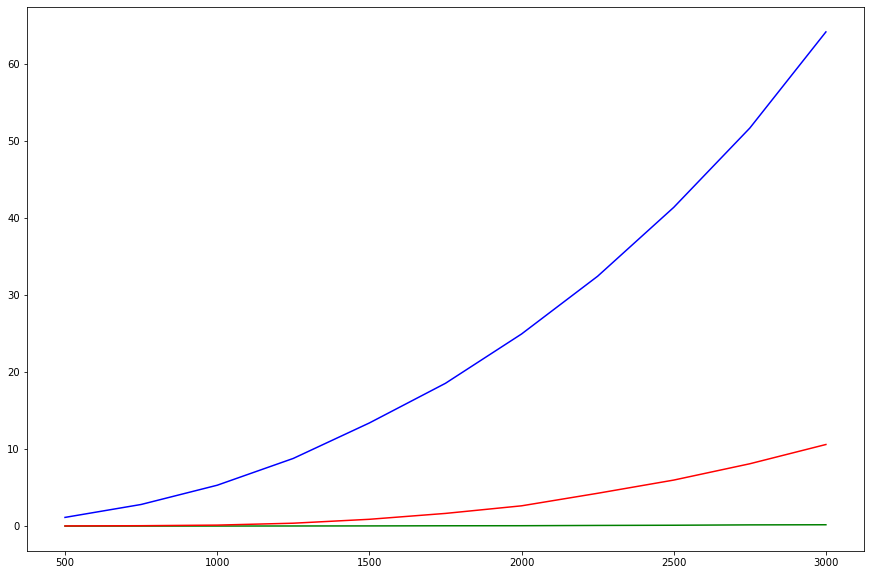

In [5]:
def test_time_Gauss_Jordan ():
    x = []
    GJ = []
    LS = []
    LL = []
    for size in range (500, 3001, 250):
        x.append (size)
        matrix = np.random.uniform(-100, 100, (size,size))
        vector = np.random.uniform(-100, 100, size)
        GJ.append(measure_time(Gauss_Jordan, matrix, vector))
        LS.append(measure_time(np.linalg.solve, matrix, vector))
        LL.append(measure_time(np.linalg.lstsq, matrix, vector))
    plt.figure(figsize=(15,10))
    plt.plot(x, GJ, color = 'b')
    plt.plot(x, LS, color = 'g')
    plt.plot(x, LL, color = 'r')
    
test_time_Gauss_Jordan ()
        

## Faktoryzacja LU

Funkcja dokonuje faktoryzacji LU w miejscu, wyniki są zapisywane w jednej macierzy. Możemy tak zrobić ponieważ na przekątnej głównej w macierzy L są zawsze jedynki więc przekątna i to co pod nią to macierz U a to co nad przekątną to macierz L. Faktoryzacji dokonałem na 10 losowych macierzach kwadratowych o rozmiarze od 500 d0 3000 z krokiem 250. Dla każdej policzyłem normę z różnicy LU - macierz oraz sprawdziłem funkcją np.allclose czy wynik mnożenia daje wyjściową macierz. Wyniki są poprawne. Funkcja `make_LU` ma za zadanie odczytać macierz L i U z otrzymanej macierzy.

In [8]:
def factor_LU (matrix):
    n = len (matrix)
    matrix = np.array(matrix, dtype=np.float64)
    for i in range (n):
        v = matrix [i,i]
        for j in range (i+1, n):
            v = matrix [j,i] = matrix [j,i] / matrix[i,i]
            matrix [j,i+1:] -= v * matrix [i,i+1:]
    return matrix

def make_LU (matrix):
    L = np.zeros_like(matrix)
    U = np.zeros_like(matrix)
    n = len(matrix)
    for i in range (n):
        for j in range (n):
            if i<j:
                U[i,j] = matrix[i,j]
            elif i>j:
                L[i,j] = matrix[i,j]
            else:
                U[i,j] = matrix[i,j]
                L[i,j] = 1
    return L, U

In [9]:
def test_LU ():
    for size in range (500, 3000, 250):
        matrix = np.random.uniform(-100, 100, (size,size))
        L, U = make_LU (factor_LU (matrix.copy()))
        norm = abs((L @ U) - matrix).sum()
        print ("Macierz o rozmiarze", size, "ma normę równą", norm)
        print ("Wynik mnożenia jest zgodny?", np.allclose(L @ U, matrix))
        
test_LU ()

Macierz o rozmiarze 500 ma normę równą 3.1681889327510706e-06
Wynik mnożenia jest zgodny? True
Macierz o rozmiarze 750 ma normę równą 1.8293123443941656e-05
Wynik mnożenia jest zgodny? True
Macierz o rozmiarze 1000 ma normę równą 3.455943542228333e-05
Wynik mnożenia jest zgodny? True


KeyboardInterrupt: 

## Analiza obwodów elektrycznych

### Wczytanie grafu

Funkcja `read_graph` odczytuje graf z podanego pliku, zapisuje go w dwóch strukturach danych. Pobiera również wartości miejsca i przyłożonego napięcia do obwodu jeśli nie podano. Zwracane struktury to graf nieskierowany ważony G zapisany na słownikach, jest on w postaci listy sąsiedztwa. Oraz słownik edges, który dla dwóch wierzchołków zwraca numer krawędzi jeśli taka jest w grafie (związane z rozwiązywanym układem równań - numer zmiennej). Zakładamy, że numery wierzchołków zaczynają się od 1 oraz dla napięcia tworzony jest nowy wierzchołek -1. Zakładamy, że w grafie prąd płynie od ierzchołka o mniejszym numerze do wierzchołka o większym numerze, jeśli podczas obliczeń natężenie będzie ujemne oznacza to, że prąd płynie w przeciwnym kierunku.

In [8]:
def read_graph (file_path = "graph.txt", s = None, t = None, E = None):
    file = open (file_path, "r")
    G = {}
    edges = {}
    i = 0
    for line in file:
        x, y, w = [int(el) for el in line.split()]
        if x not in G:
            G[x] = {}
        if y not in G:
            G[y] = {}
        G[x][y]=w
        G[y][x]=w
        edges[(x,y)] = i
        edges[(y,x)] = i
        i+=1
    file.close()
    if s == None:
        s = int (input ("Podaj s: "))
    if t == None:
        t = int (input ("Podaj t: "))
    if E == None:
        E = int (input ("Podaj E: "))
    G[-1] = {}
    G[s][-1] = 0
    G[-1][s] = 0
    G[t][-1] = 0
    G[-1][t] = 0
    edges[(s,-1)] = i
    edges[(-1,s)] = i
    i+=1
    edges[(t,-1)] = i
    edges[(-1,t)] = i
    return G, edges, s, t, E

### Szukanie cykli

Funkcja ma za zadanie znaleźć wszystkie cykle w grafie i zwrócić je jako listę. Działa ona z wykorzystaniem DFSa. Jest ona jednak wolniejsza od DFSa, im więcej cykli tym wzrasta złożoność obliczeniowa. Graf jest przeszukiwany DFSem jednakże o tym czy odwiedzić dany wierzchołek nie decyduje to czy go już odwiedziliśmy ale to czy znajduje się wśród rodziców danego wierzchołka w "drzewie" DFS. Przez to dany wierzchołek jest odwiedzany kilka razy, ale dzięki temu wszystkie cykle zostają znalezione. Aby nie powtarzac znalezionych cykli dodane zostały funkcje normujące zapis. Jednakże funkcja ta dla dużych grafów działa zbyt wolno, więc poszukuje cykle proste za pomocą zwykłego DFSa, nie idąc w odwiedzone już i jeśli znajdę rodzica to dopisuje cykl.

In [9]:
def find_cycles_ (G): #niewykorzystywana
    def start_smallest (arr):
        n = arr.index(min(arr))
        res1 = arr[n:]+arr[:n]
        return res1
    
    def normalise (arr):
        return start_smallest(arr), start_smallest(arr[::-1])
    
    def add_cycles (cycles, cyc):
        if len(cyc) <= 2:
            return
        norm = normalise (cyc)
        if norm[0] not in cycles and norm[1] not in cycles:
            cycles.append(norm[0])
    
    def DFS (G, v, cycles, path):
        for u in G[v].keys():
            if u not in path:
                path.append(u)
                DFS (G, u, cycles, path)
                del (path[-1])
            else:
                k = path.index(u)
                add_cycles (cycles, path[k:])
    
    cycles = []
    n = len(G)
    path = []
    path.append(1)
    DFS (G, 1, cycles, path)
    return cycles

In [10]:
def find_cycles (G):
    def start_smallest (arr):
        n = arr.index(min(arr))
        res1 = arr[n:]+arr[:n]
        return res1
    
    def normalise (arr):
        return start_smallest(arr), start_smallest(arr[::-1])
    
    def add_cycles (cycles, cyc):
        if len(cyc) <= 2:
            return
        norm = normalise (cyc)
        if norm[0] not in cycles and norm[1] not in cycles:
            cycles.append(norm[0])
    
    def DFS (G, v, vis, cycles, path):
        if v == -1:
            vis[0]=1
        else:
            vis[v]=1
        for u in G[v].keys():
            t = vis[0] if u == -1 else vis[u]
            if t == 0:
                path.append(u)
                DFS (G, u, vis, cycles, path)
                del (path[-1])
            elif u in path:
                k = path.index(u)
                add_cycles (cycles, path[k:])
    
    cycles = []
    n = len(G)
    vis = [0]*n
    path = []
    path.append(1)
    DFS (G, 1, vis, cycles, path)
    return cycles

### Prawa Kirchoffa

Zadaniem tej funkcji jest stworzenie układu równań z wykorzystanie I i II prawa Kirchoffa. Najpierw tworzone są równania dla każdego węzła, jednak jest ich za mało, więc tworzymy równania dla każdego cyklu tworząc układ nadokreślony. I prawo mówi o tym, że suma prądów wpływającyh do węzła jest równa sumie prądów wypływających. Treść II prawa mówi, że suma spadków napięc w oczku (cyklu) wynosi 0.

In [11]:
def matrix_from_Kirchoff (graph, s, t, E):
    G, edges = graph
    array = []
    size = len (edges) // 2
    vector = []
       
    #I prawo Kirchoffa
    for v in G.keys():
        arr = [0] * size
        for u, w in G[v].items():
            m = 1
            if u > v: m = -1
            arr[edges[(u,v)]] = m
        if v == -1:
            arr[edges[(-1,t)]] = 1
        if v == t:
            arr[edges[(-1,t)]] = -1
        array.append(arr.copy())
        vector.append(0)
    
    #II prawo Kirchoffa
    cycles = find_cycles (G)
    for cycle in cycles:
        arr = [0] * size
        vec = 0
        for i in range (len(cycle)):
            v, u = cycle[i-1], cycle[i]
            if u == -1:
                if v == t:
                    vec = E
                else:
                    vec = (-1) * E
            m = 1
            if u < v: m = -1
            if u == -1 and v == t:
                m *= (-1)
            if u == t and v == -1:
                m *= (-1)
            arr[edges[(u,v)]] = m * G[u][v]
        array.append(arr.copy())
        vector.append(vec)
        
    return np.array(array, dtype = np.float64), np.array(vector, dtype = np.float64)

### Potencjały węzłowe

Funkcja tworzy układ równań dla każdego węzła na podstwie potencjału. Ustalamy w wierzchołku t potencjał 0 a w wierzchołku s potencjał E. Metoda polega na zapisaniu natężeń w I prawie Kirchoffa za pomocą ilorazów napięć (różnicy potencjałów) i oporu a następnie przekształcenie, tak aby potencjały w węzłach były niewiadomymi. Otrzymujemy układ równań, w którym macierz A jest kwadratowa.

In [12]:
def matrix_from_nodal (graph, s, t, E):
    G, edges = graph
    array = []
    size = len (G) - 1
    vector = [0] * size
    line = [0] * size
    line[s-1] = 1
    vector[0] = E
    array.append(line)
    line = [0] * size
    line[t-1] = 1
    array.append(line)
    for v in G.keys():
        if v == -1 or v == s or v == t:
            continue
        line = [0] * size
        for u in G.keys():
            if u == -1:
                continue
            if u == v:
                val = 0
                for R in G[u].values():
                    val += 1/R
                line[u-1] = val
            else:
                val = 0
                R = G[u].get(v, 0)
                if R != 0: val = 1/R
                line[u-1] = (-1) * val
        array.append(line)
        
    return np.array(array, dtype = np.float64), np.array(vector, dtype = np.float64)

### Obliczanie natężeń dwoma metodami i wizualizacja

Funkcja korzysta z poprzednich funkcji i uzyskuje układy równań, które rozwiązuje. Uzyskane wyniki sprawdza za pomocą I prawa Kirchoffa. Tworzy wizualizację za pomocą biblioteki NetworkX.

Metoda potencjałów dostarcza układ, który rozwiązuje za pomocą `np.linalg.solve`. Uzyskuje w ten sposób potencjały na każdym węźle. Następnie należy obliczyć napięcie na każdej krawędzi i z prawa Ohma obliczam natężenie prądu w danej krawędzi.

Prawa Kirchoffa dostarczają układ nadokreślony. Taki układ nie ma jednoznacznego rozwiązania. Poszukujemy więc przybliżonego rozwiązania. Rozwiązuje się go poprzez domnożenie z lewej strony do równania AX=B macierzy A transponowane (At) i uzyskujemy AtAX=AtB wtedy A' = AtA i jest kwadratową macierzą i B' = AtB. Otrzymujemy układ A'X = B' który również rozwiązuje za pomocą `np.linalg.solve`. Otrzymany wynik jest przybliżonym rozwiązaniem równania w którym błąd średnio kwadratowy jest najmniejszy z możliwych. Wynika to z faktu analizy funkcji obliczającej błąd średniokwadratowy rozwiązania. Jeśli taką funkcję zróżniczkujemy po każdej ze zmiennych i przyrównamy do zera (WK minimum) to otrzymujemy układ równań w którym współczynniki powstają poprzez domnożenie macierzy A transponowanej. Rozwiązanie takiego układu daje wyniki wyjściowej macierzy w której błąd średniokwadratowy jest najmniejszy.

In [13]:
def test_result (G, edges, t, result):
    res = True
    for v in G.keys():
        node = 0
        for u in G[v].keys():
            i = edges[(u,v)]
            I = result[i]
            if v == t and u == -1: node -= I
            elif v == -1 and u == t: node += I
            elif u < v: node += I
            else: node -= I
        if not np.allclose(node, 0):
            print ("Dla węzła", v, "suma prądów wyniosła", node)
            res = False
    return res

def draw_graph (G, edges, s, t, res, pos):
    DG = nx.DiGraph()
    list_edges = []
    lab_e = {}
    weights = []
    for u in G.keys():
        if u == -1: continue
        for v in G[u].keys():
            if v == -1: continue
            tmp = 1
            if u < v: tmp = -1
            w = res[edges[(u,v)]]
            if w > 0:
                tmp *= -1
            if tmp > 0:
                list_edges.append((u, v))
                weights.append(round(abs(w), 5))
                lab_e[(u,v)] = G[u][v]
                #lab_e[(u,v)] = "R=" + str(G[u][v]) + ", I=" + str(round(abs(w),1))
    DG.add_edges_from(list_edges)
    if pos == None: pos = nx.circular_layout(DG)
    lab = {s:"start", t:"end"}
    nx.draw_networkx(DG, 
            pos = pos, 
            node_color="cyan", 
            edgelist=list_edges,
            edge_color=weights, 
            width=8.0, 
            edge_cmap=plt.cm.YlOrRd,
            font_size = 20,
            labels=lab,
            arrowstyle = "-|>",
            arrowsize = 50)
    nx.draw_networkx_edge_labels (DG,
                         pos = pos,
                         edge_labels=lab_e,
                         font_size=15)

def calculate_circuit (file_path = "graph.txt", s = None, t = None, E = None, pos = None):
    G, edges, s, t, E = read_graph(file_path, s, t, E)
    matrix_Kirchoff, vector_Kirchoff = matrix_from_Kirchoff ((G, edges), s, t, E)
    matrix_nodal, vector_nodal = matrix_from_nodal ((G, edges), s, t, E)
    A = matrix_Kirchoff.T @ matrix_Kirchoff
    V = matrix_Kirchoff.T @ vector_Kirchoff
    res_Kirchoff = np.linalg.solve (A, V)
    pot_nodal = np.linalg.solve (matrix_nodal, vector_nodal)
    res_nodal = np.zeros_like (res_Kirchoff)
    #res_nodal = np.zeros((len(edges)//2))
    for edge, i in edges.items():
        if -1 in edge: continue
        u, v = edge
        if res_nodal[i] == 0:
            if u > v: u, v = v, u
            I = (pot_nodal[u-1] - pot_nodal[v-1]) / G[u][v]
            res_nodal[i] = I
    J = 0
    for v in G[t].keys():
        J += abs(res_nodal[edges[(v, t)]])
    res_nodal[edges[(s, -1)]] = J
    res_nodal[edges[(t, -1)]] = J
    
    if not test_result (G, edges, t, res_Kirchoff):
        print ("Metoda prawami Kirchoffa nieprawidłowa.")
    if not test_result (G, edges, t, res_nodal):
        print ("Metoda potencjałów węzłowych nieprawidłowa.")
    plt.figure(1, figsize=(20,20))
    plt.title("Graf natężeń prądu dla metody praw Kirchoffa.")
    draw_graph (G, edges, s, t, res_Kirchoff, pos)
    plt.figure(2, figsize=(20,20))
    plt.title("Graf natężeń prądu dla metody potencjałów węzłowych.")
    draw_graph (G, edges, s, t, res_nodal, pos)
    plt.show()

### Testy

Testy przeprowadziłem dla kilku klas grafów. Wynki zwizualizowałem. Im ciemniejsza krawędź tym wieksze natężenie prądu. Na każdej krawędzi została napisana liczba oznaczająca opór tejże krawędzi. Testy za pomocą I prawa Kirchoffa nie zwracają błędów, a więc możemy przyjąć, że zadanie zostało rozwiązane poprawnie. Metoda potencjałów węzłowych jest szybsza, ponieważ nie trzeba poszukiwać cykli. Na wykresie na czerowno za pomocą praw Kirchoffa a na niebiesko metoda węzłowa.

#### Test szybkości

In [14]:
def make_conec (edges, n):
    def DFS (G, v, vis, S):
        S.add(v)
        vis[v]=1
        for u in range(len(G[v])):
            if G[v][u] > 0 and vis [u] == 0:
                DFS (G, u, vis, elem[-1])
    
    G = [[0]*n for _ in range(n)]
    for u, v in edges:
        G[u][v]=1
        G[v][u]=1
    vis = [0]*n
    elem = []
    for i in range (n):
        if vis[i] == 0:
            elem.append(set())
            DFS (G, i, vis, elem[-1])
    E = list(edges)
    for i in range (len (elem)-1):
        u = sample(elem[i], 1)[0]
        v = sample(elem[i+1], 1)[0]
        E.append((u,v))
    return E

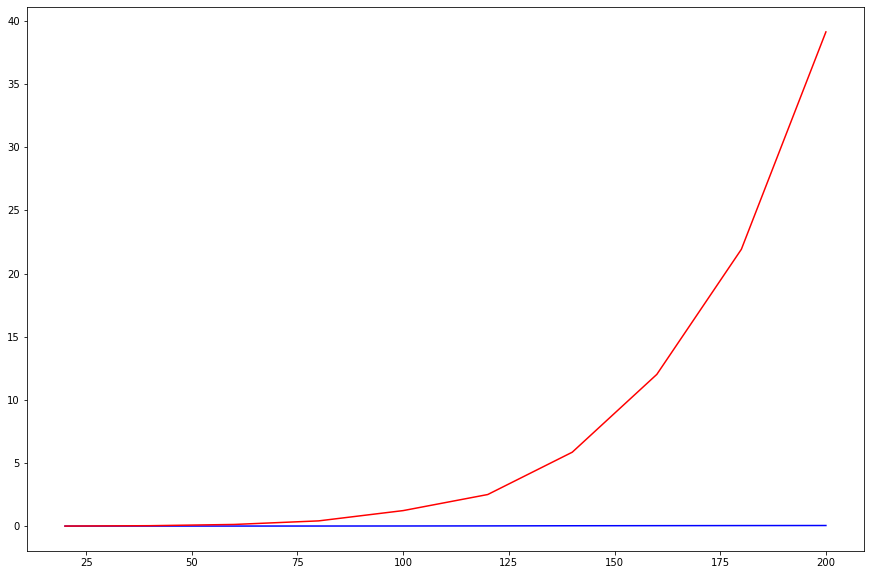

In [15]:
def time_of_circuit (file_path = "graph.txt", s = None, t = None, E = None, pos = None):
    G, edges, s, t, E = read_graph(file_path, s, t, E)
    
    start_time = time.time()
    matrix_Kirchoff, vector_Kirchoff = matrix_from_Kirchoff ((G, edges), s, t, E)
    A = matrix_Kirchoff.T @ matrix_Kirchoff
    V = matrix_Kirchoff.T @ vector_Kirchoff
    res_Kirchoff = np.linalg.solve (A, V)
    end_time = time.time()
    time1 = end_time - start_time
    
    start_time = time.time()
    matrix_nodal, vector_nodal = matrix_from_nodal ((G, edges), s, t, E)
    pot_nodal = np.linalg.solve (matrix_nodal, vector_nodal)
    res_nodal = np.zeros_like (res_Kirchoff)
    for edge, i in edges.items():
        if -1 in edge: continue
        u, v = edge
        if res_nodal[i] == 0:
            if u > v: u, v = v, u
            I = (pot_nodal[u-1] - pot_nodal[v-1]) / G[u][v]
            res_nodal[i] = I
    J = 0
    for v in G[t].keys():
        J += abs(res_nodal[edges[(v, t)]])
    res_nodal[edges[(s, -1)]] = J
    res_nodal[edges[(t, -1)]] = J
    end_time = time.time()
    time2 = end_time - start_time
    
    return time1, time2

def test_time ():
    x = []
    kir = []
    nod = []
    file_path = "test.txt"
    p = 0.6
    for size in range (20, 201, 20):
        x.append(size)
        
        G1 = nx.erdos_renyi_graph(size, p)
        E1 = make_conec (G1.edges(), size)
        edg = []

        file = open (file_path, "w")
        for u, v in E1:
            u+=1
            v+=1
            edg.append((u,v))
            w = randint (1, 20)
            line = str(u) + " " + str(v) + " " + str(w) + "\n"
            file.write(line)
        file.close()

        G = nx.Graph()
        G.add_edges_from(edg)

        t1, t2 = time_of_circuit(file_path = file_path, s=1, t=size//2, E=230)
        kir.append(t1)
        nod.append(t2)
        
    plt.figure(figsize=(15,10))
    plt.plot(x, nod, color = 'b')
    plt.plot(x, kir, color = 'r')
    
test_time()

#### Małe grafy

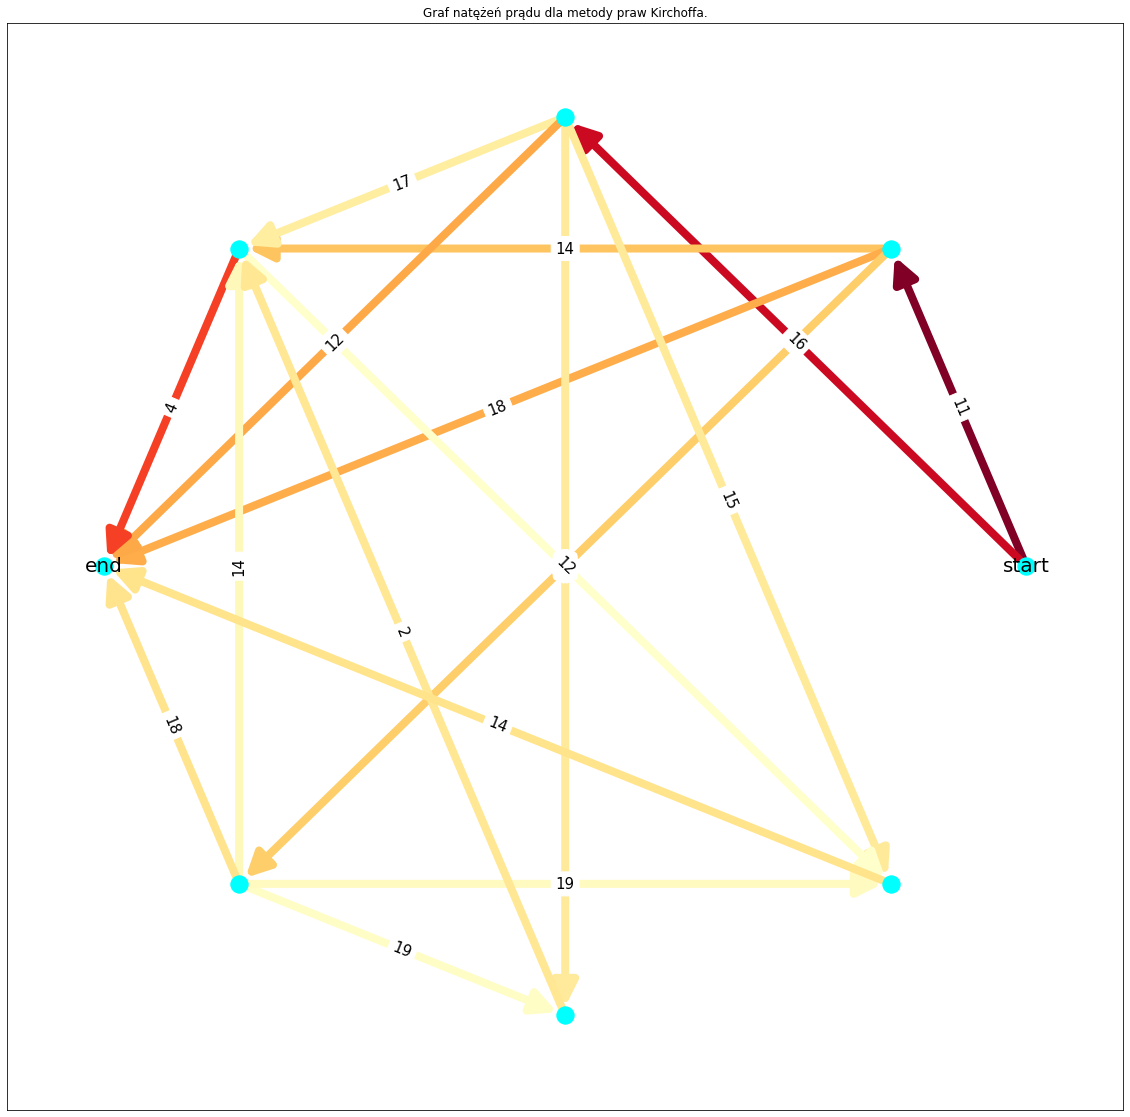

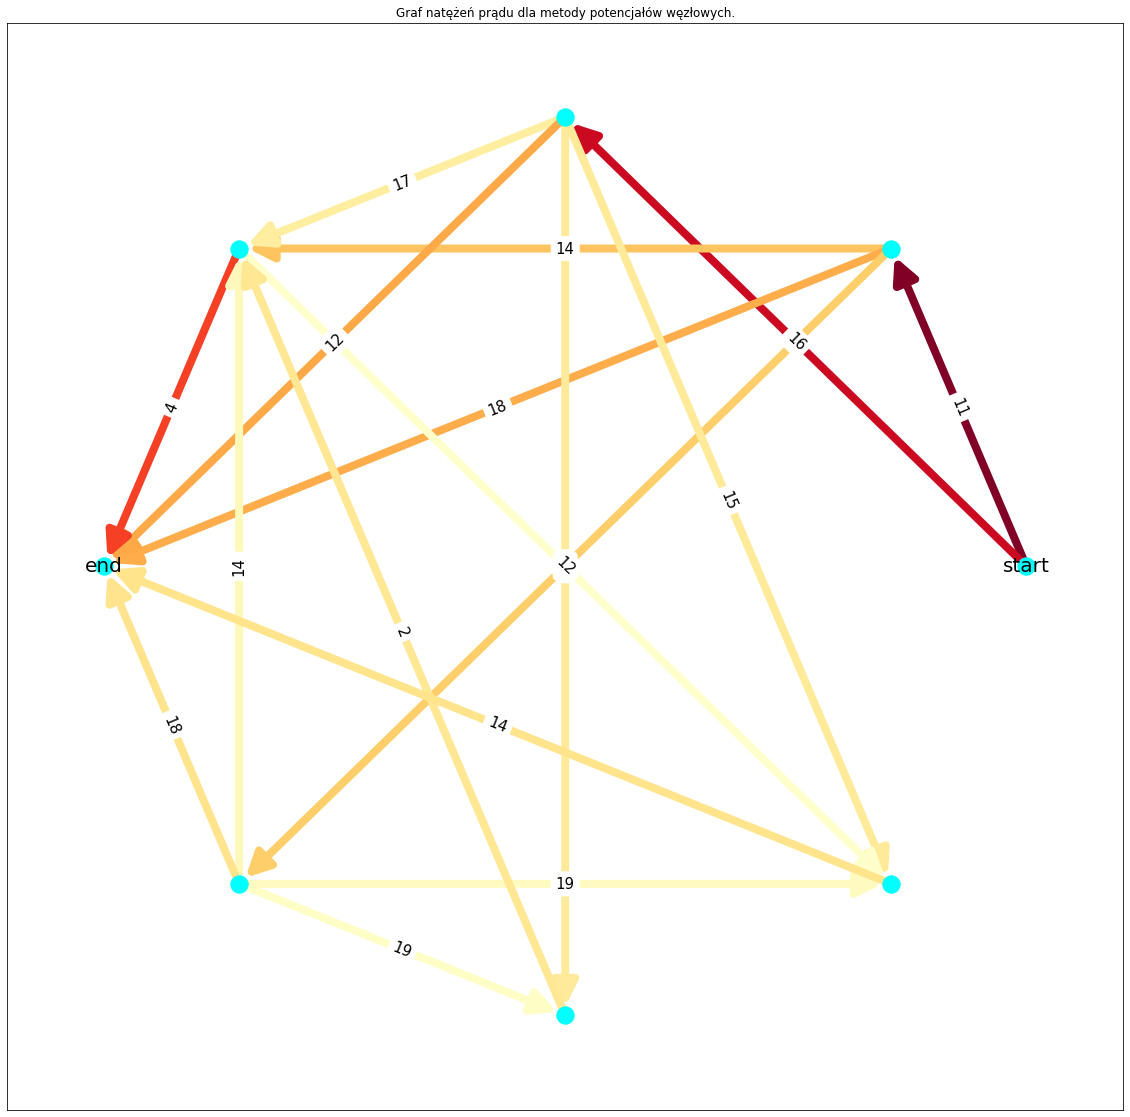

In [36]:
size = 8
p = 0.6
file_path = "small_graph_1.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=5, E=230, pos = nx.circular_layout(G))


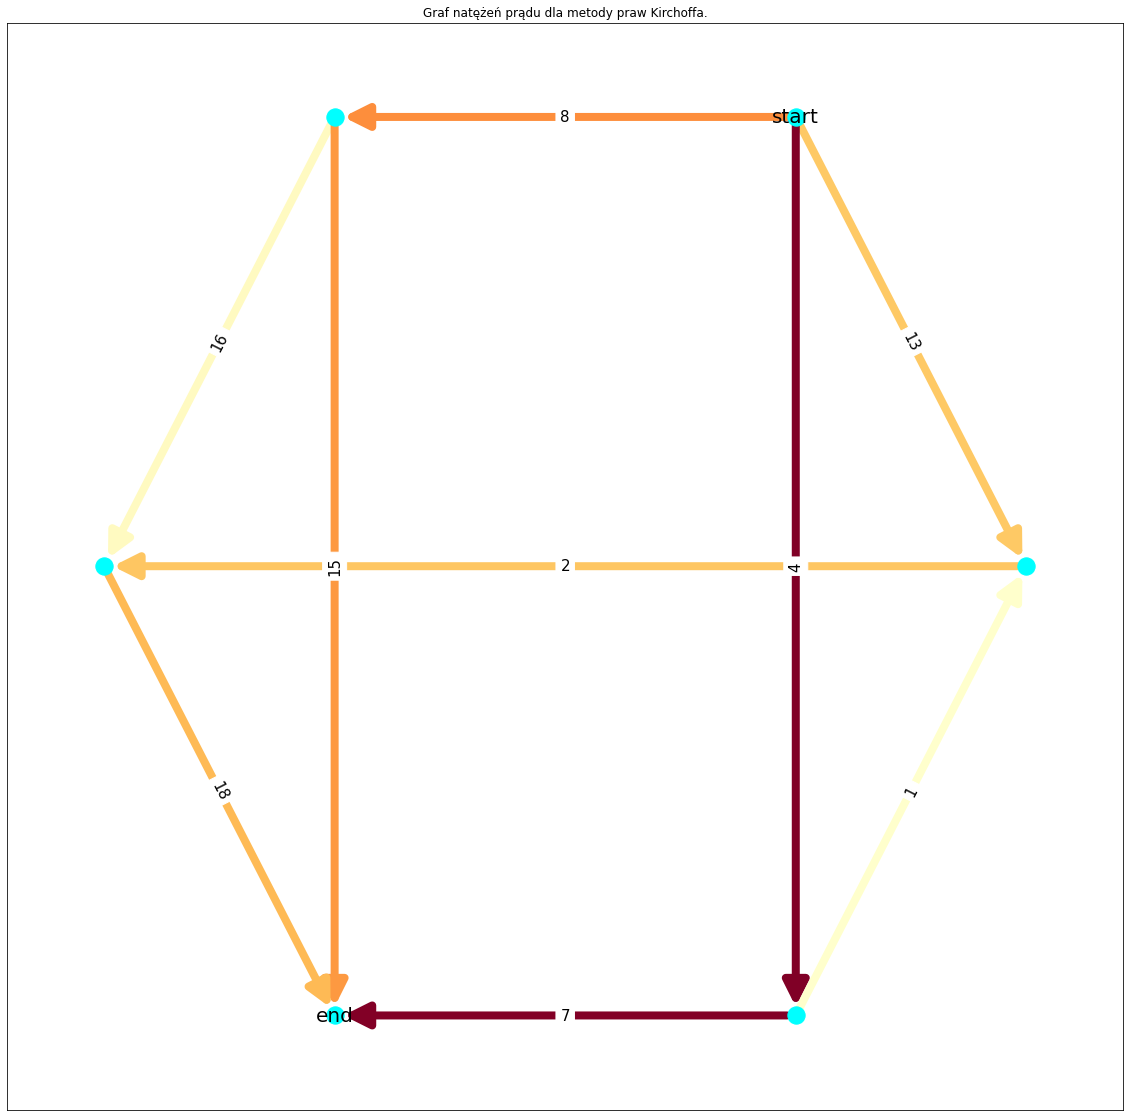

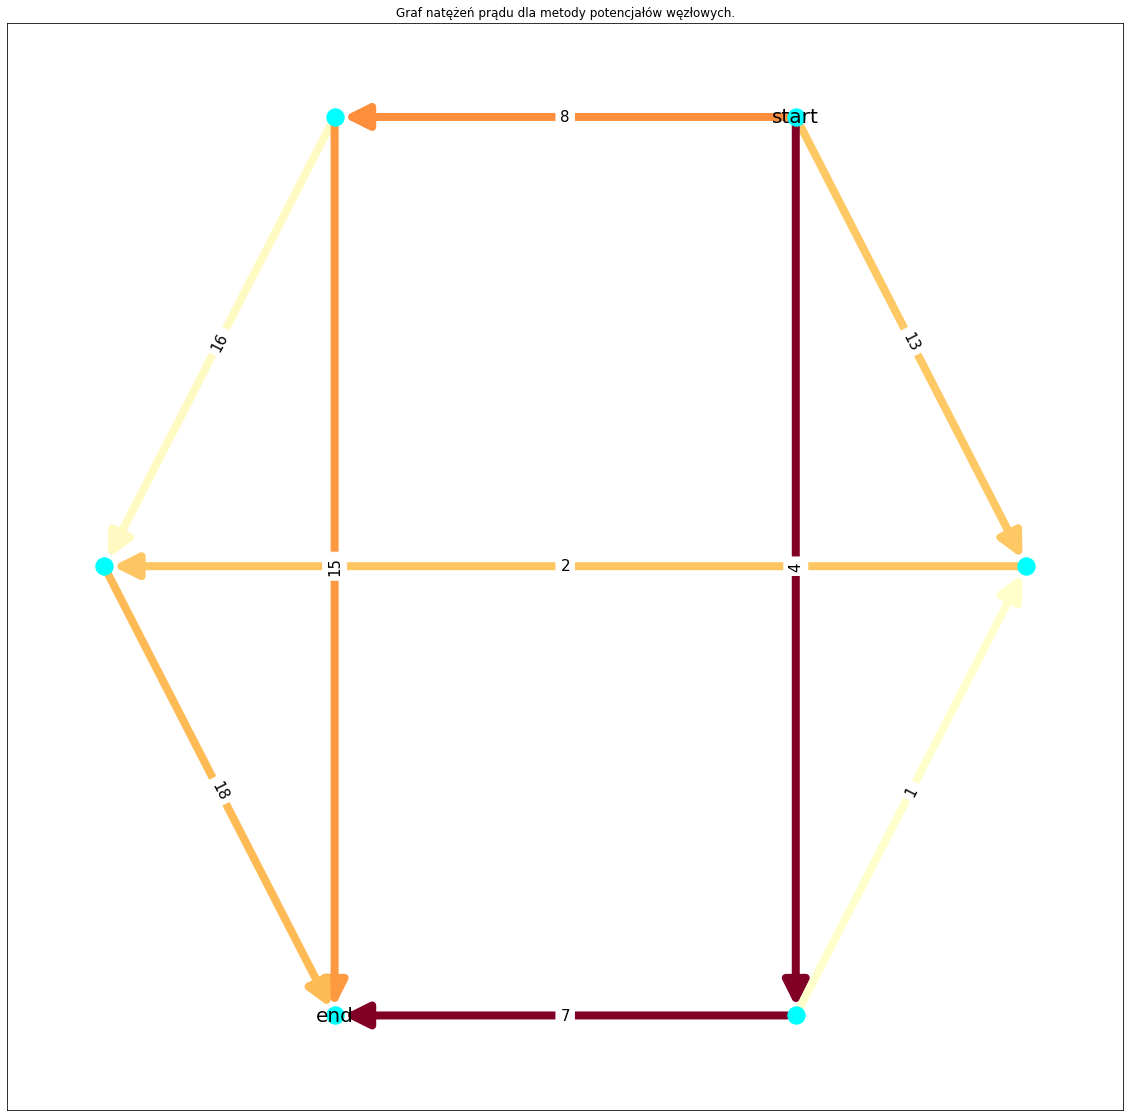

In [17]:
size = 6
file_path = "small_graph_2.txt"
file = open (file_path, "w")
V = set()
for i in range (1, size):
    V.add(i)
    w = randint (1, 20)
    line = str(i) + " " + str(i+1) + " " + str(w) + "\n"
    file.write(line)
V.add(size)
w = randint (1, 20)
line = str(1) + " " + str(size) + " " + str(w) + "\n"
file.write(line)

while len(V) > 0:
    u = sample(V, 1)[0]
    V.remove(u)
    v = sample(V, 1)[0]
    while (abs(u-v)==1 or (u==1 and v == size) or (u==size and v==1)):
        v = sample(V,1)[0]
    V.remove(v)
    if (len(V)==2):
        i, j = tuple(V)
        if (abs(i-j)==1 or (i==1 and j == size) or (i==size and j==1)):
            V.add(u)
            V.add(v)
            continue
            
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

p = np.linspace(0, 2*pi, size+1)
pos = {}
for i in range (1, size+1):
    alfa = p[i]
    pos[i] = (cos(alfa), sin(alfa))


calculate_circuit(file_path = file_path, s=1, t=4, E=230, pos = pos)

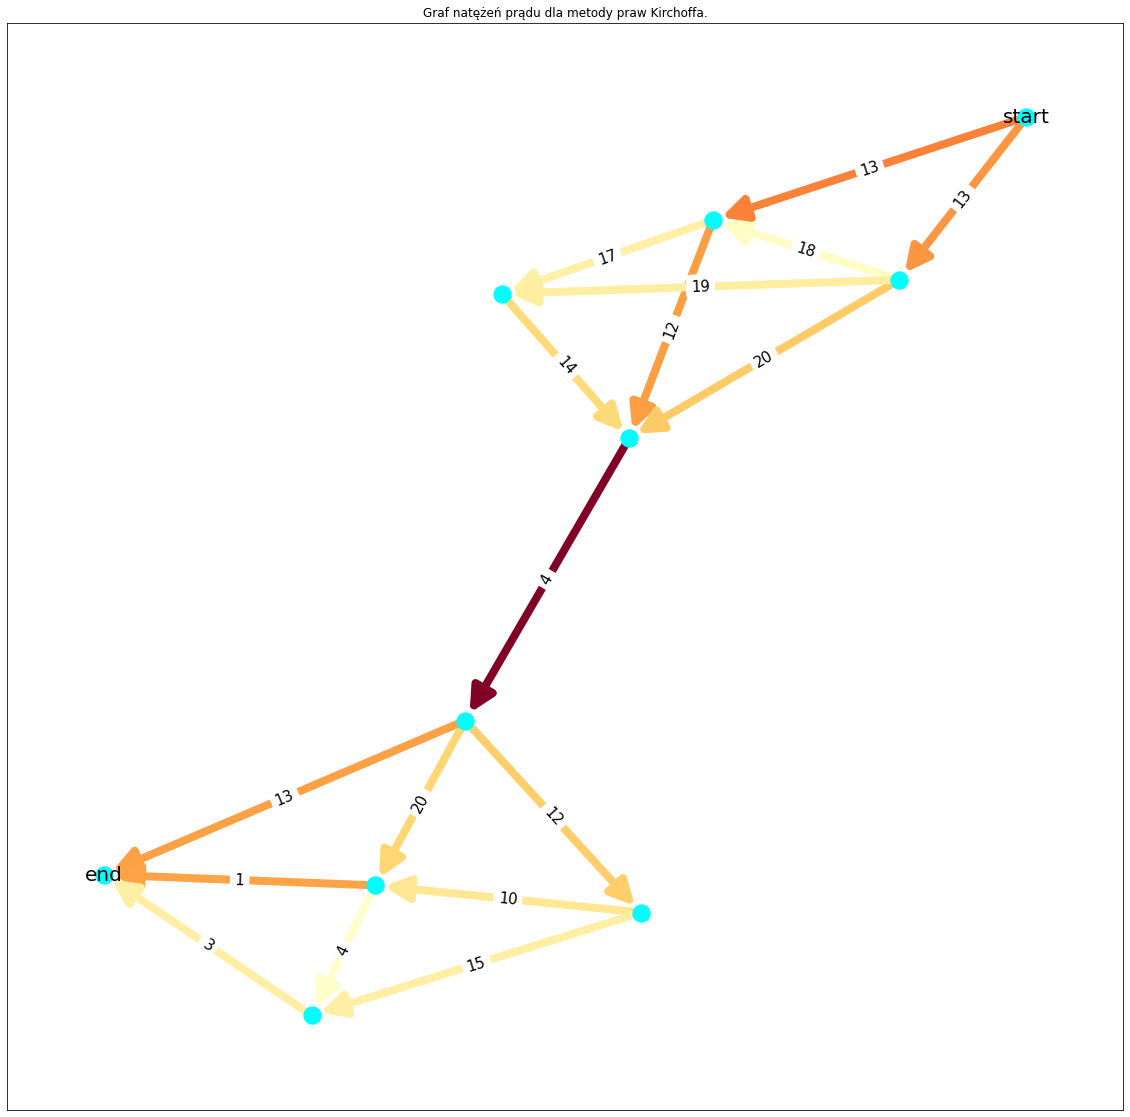

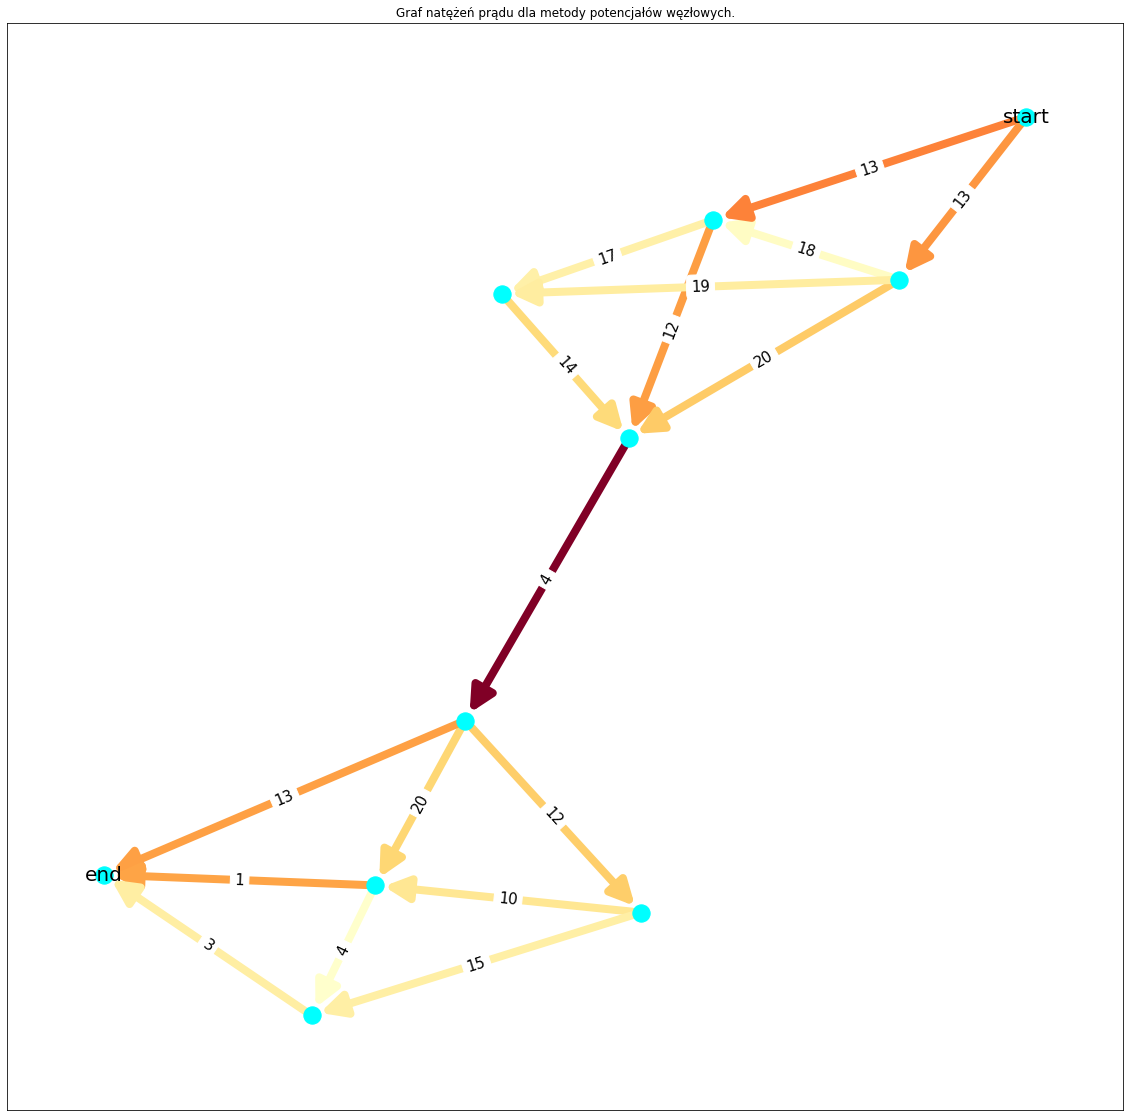

In [18]:
size = 5
p = 0.7
file_path = "small_graph_3.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)
G2 = nx.erdos_renyi_graph(size, p)
E2 = make_conec (G2.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
for u, v in E2:
    u+=(size+1)
    v+=(size+1)
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
    
u =1
v = size+1
edg.append((u,v))
w = randint (1, 20)
line = str(u) + " " + str(v) + " " + str(w) + "\n"
file.write(line)

file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=size-3, t=size+3, E=230, pos = nx.spring_layout(G))


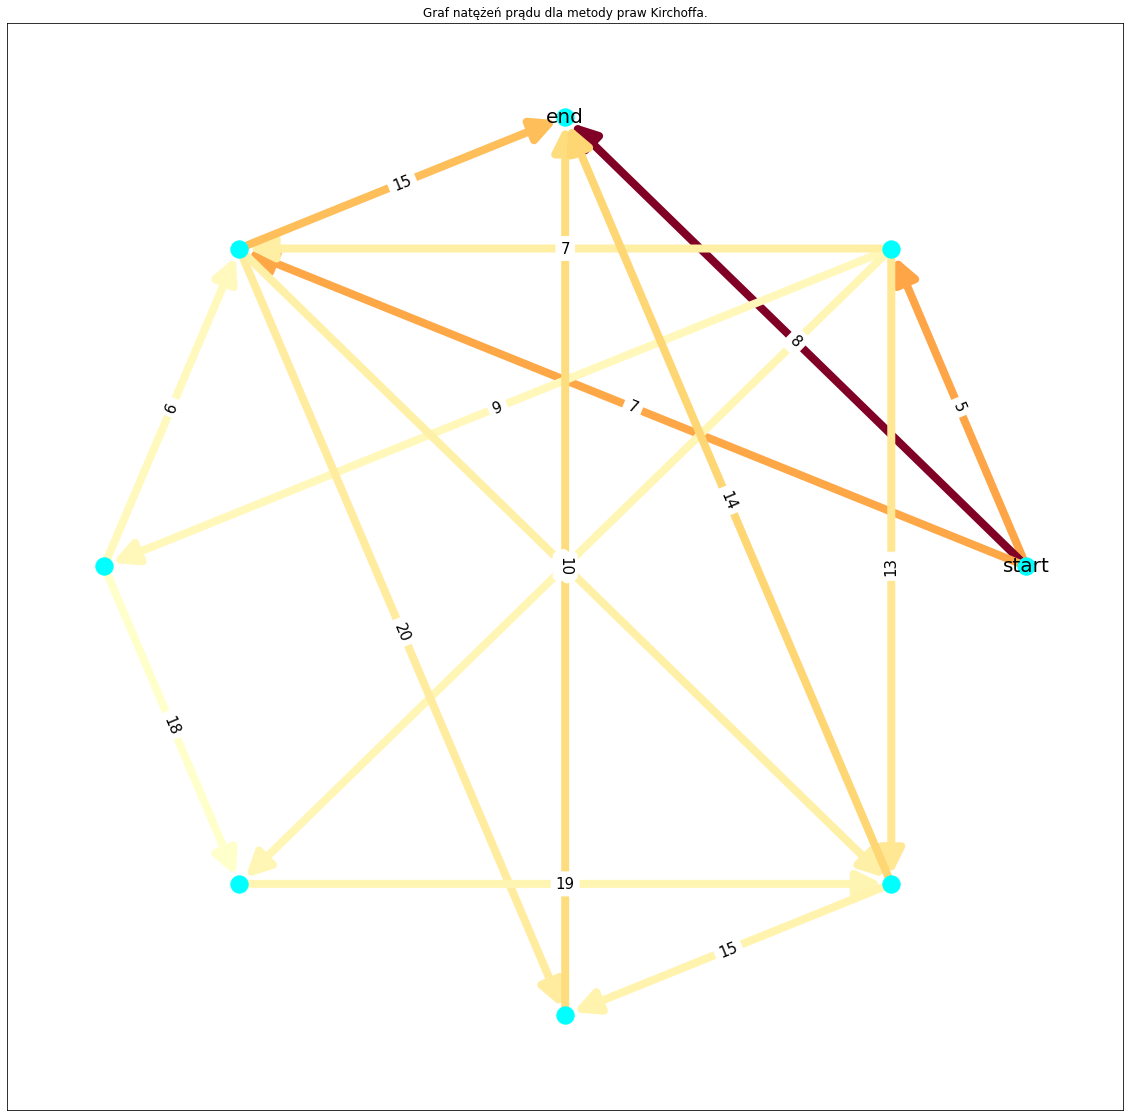

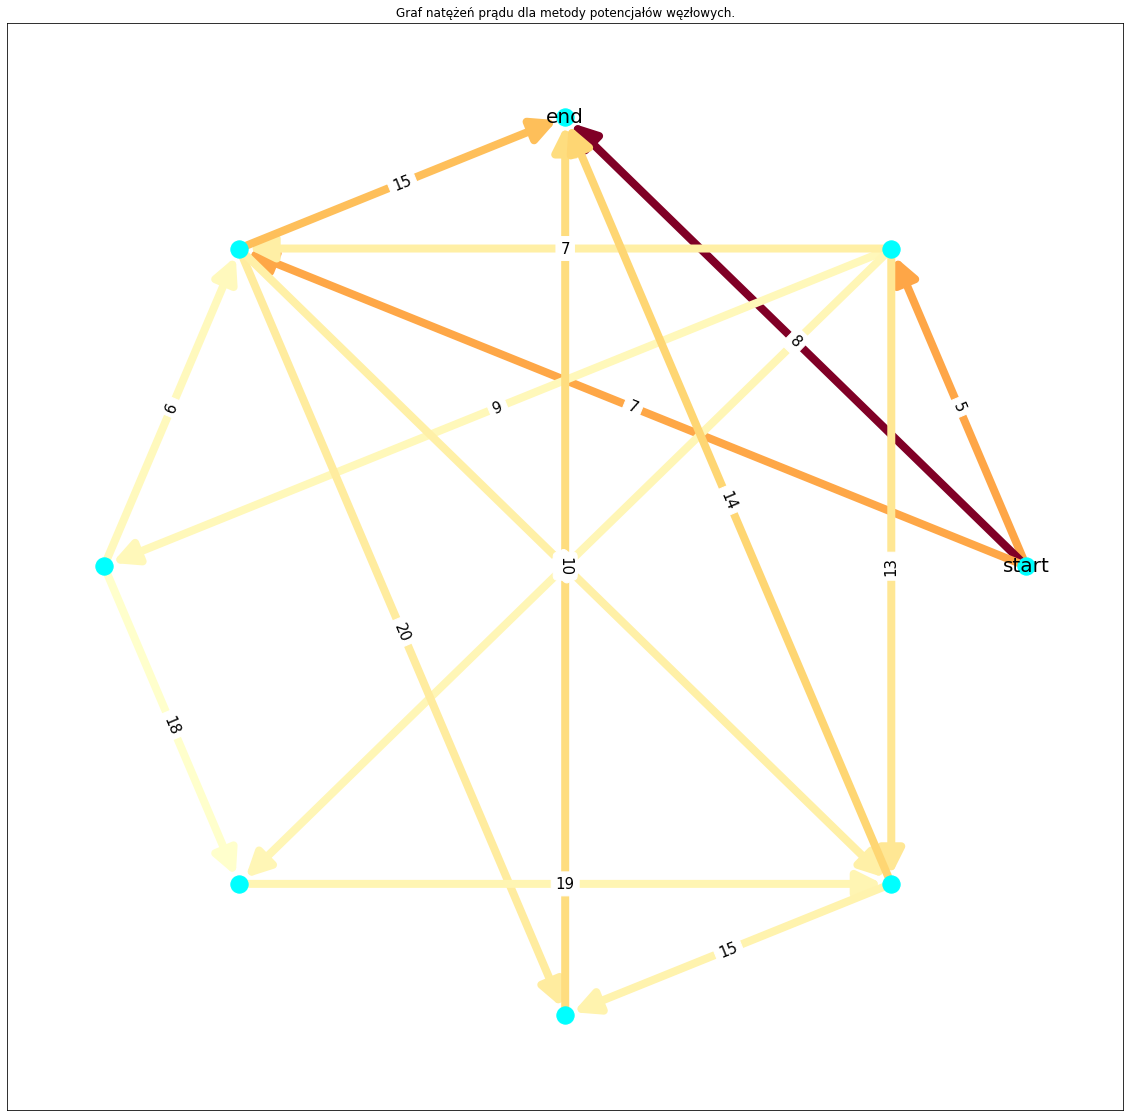

In [37]:
size = 8
k = 5
p = 0.5
file_path = "small_graph_4.txt"

G1 = nx.connected_watts_strogatz_graph(size, k, p)

edg = []

file = open (file_path, "w")
for u, v in G1.edges():
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = nx.circular_layout(G))


#### Spójny graf losowy

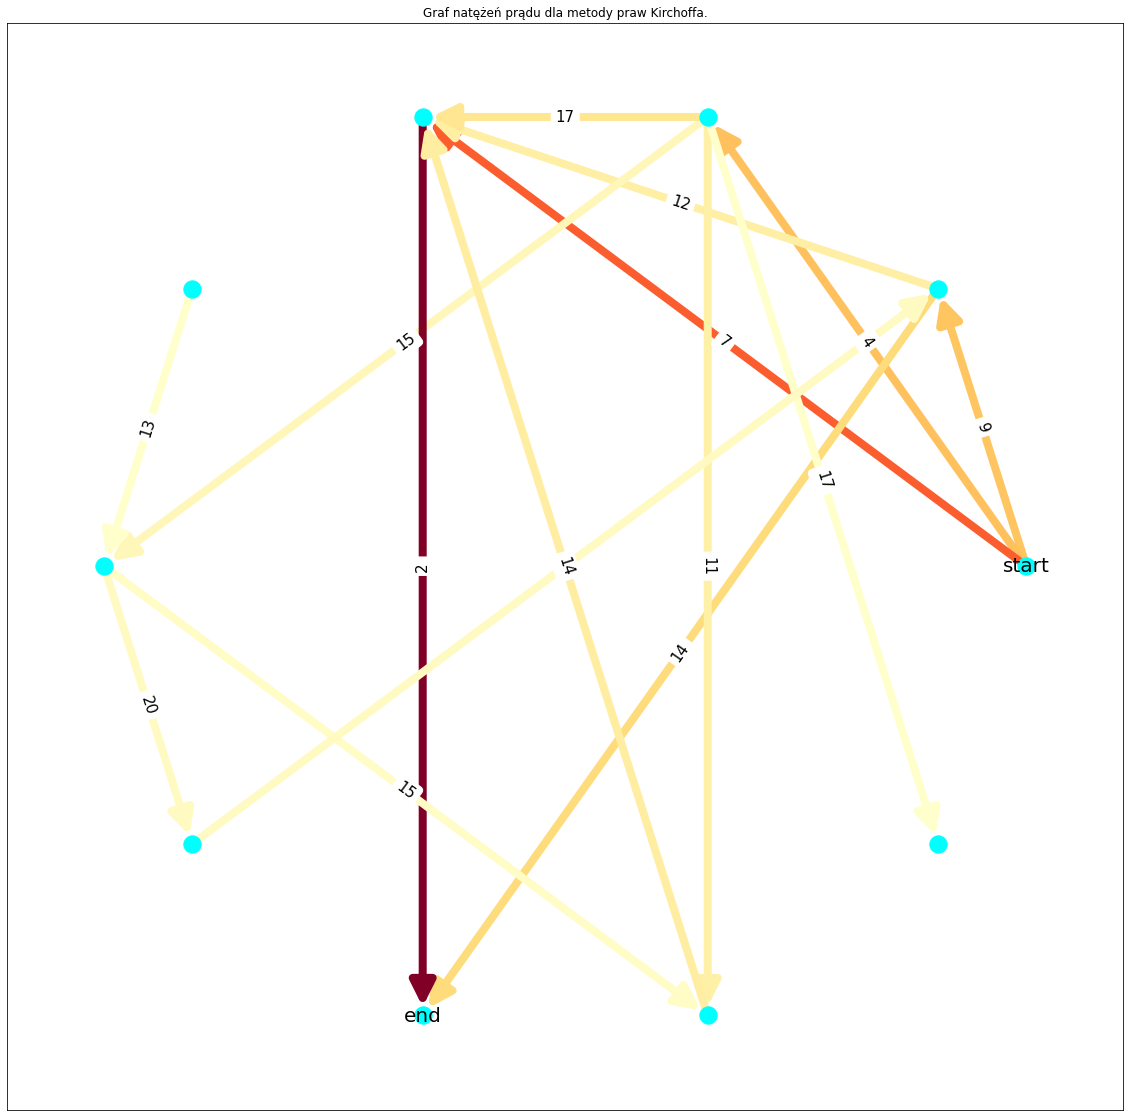

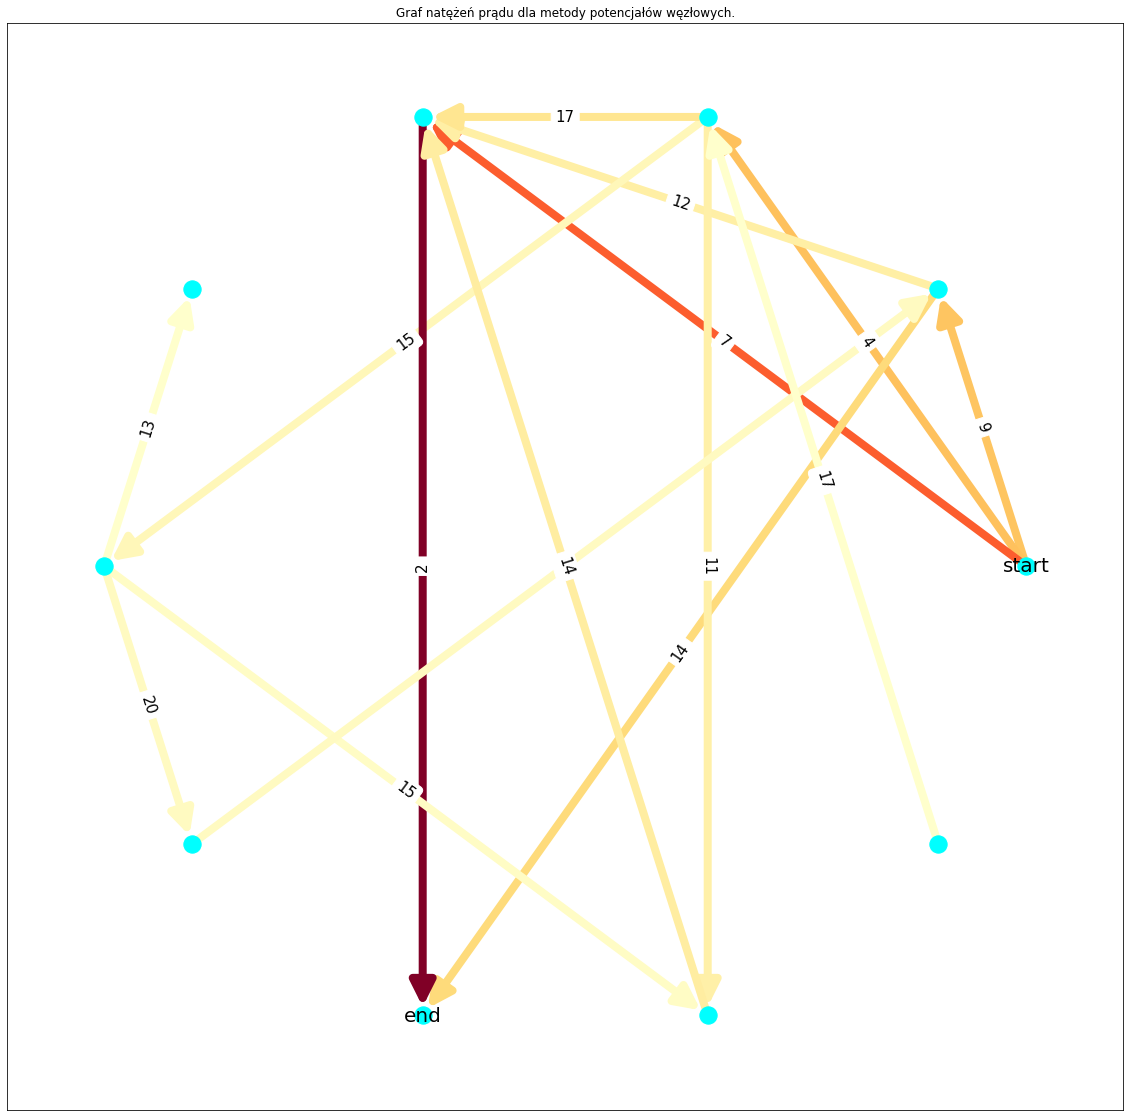

In [39]:
size = 10
p = 0.3
file_path = "ER_graph_1.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=5, E=230, pos = nx.circular_layout(G))


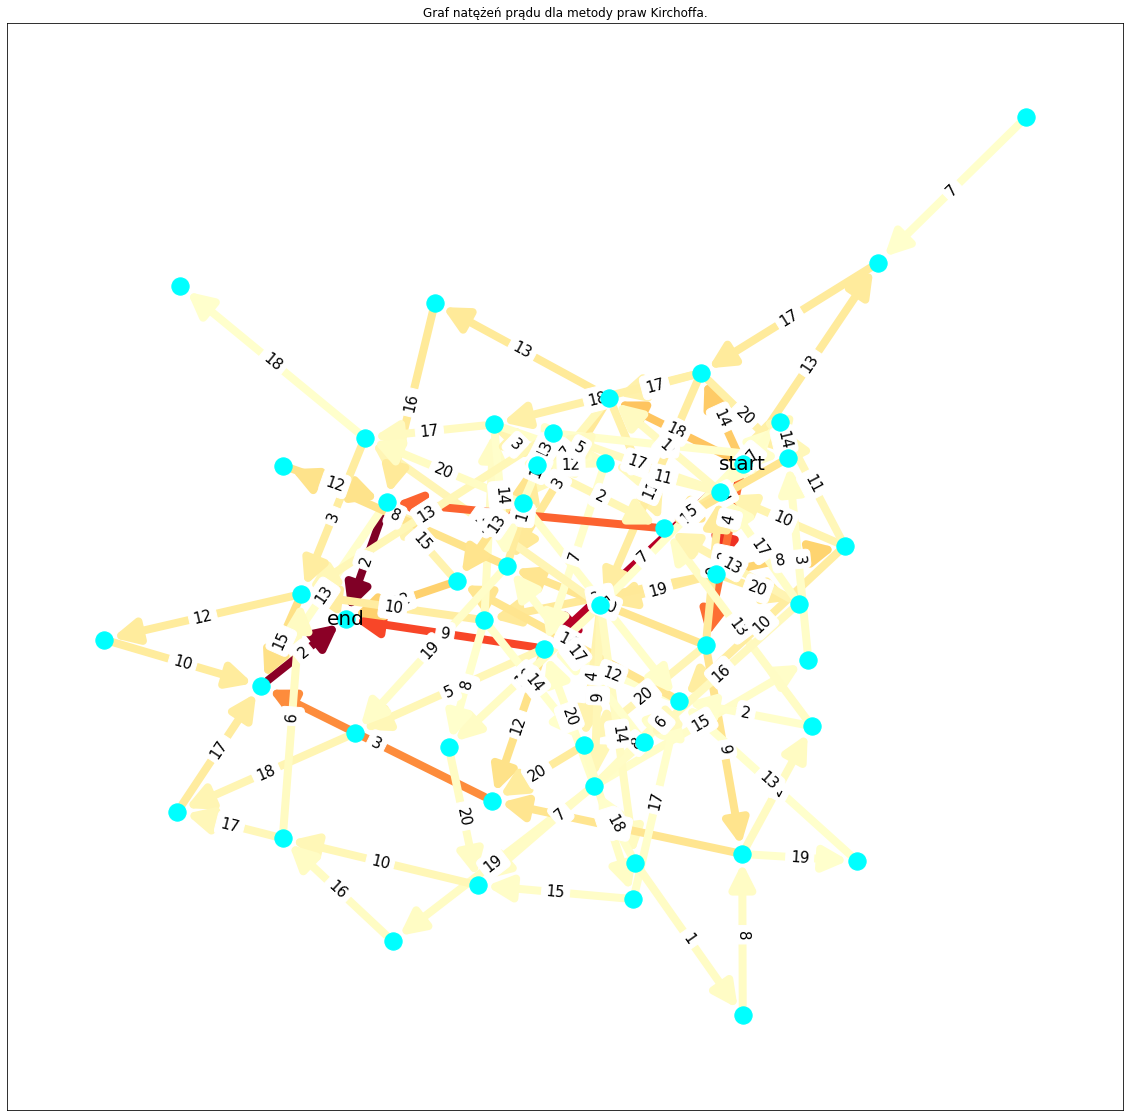

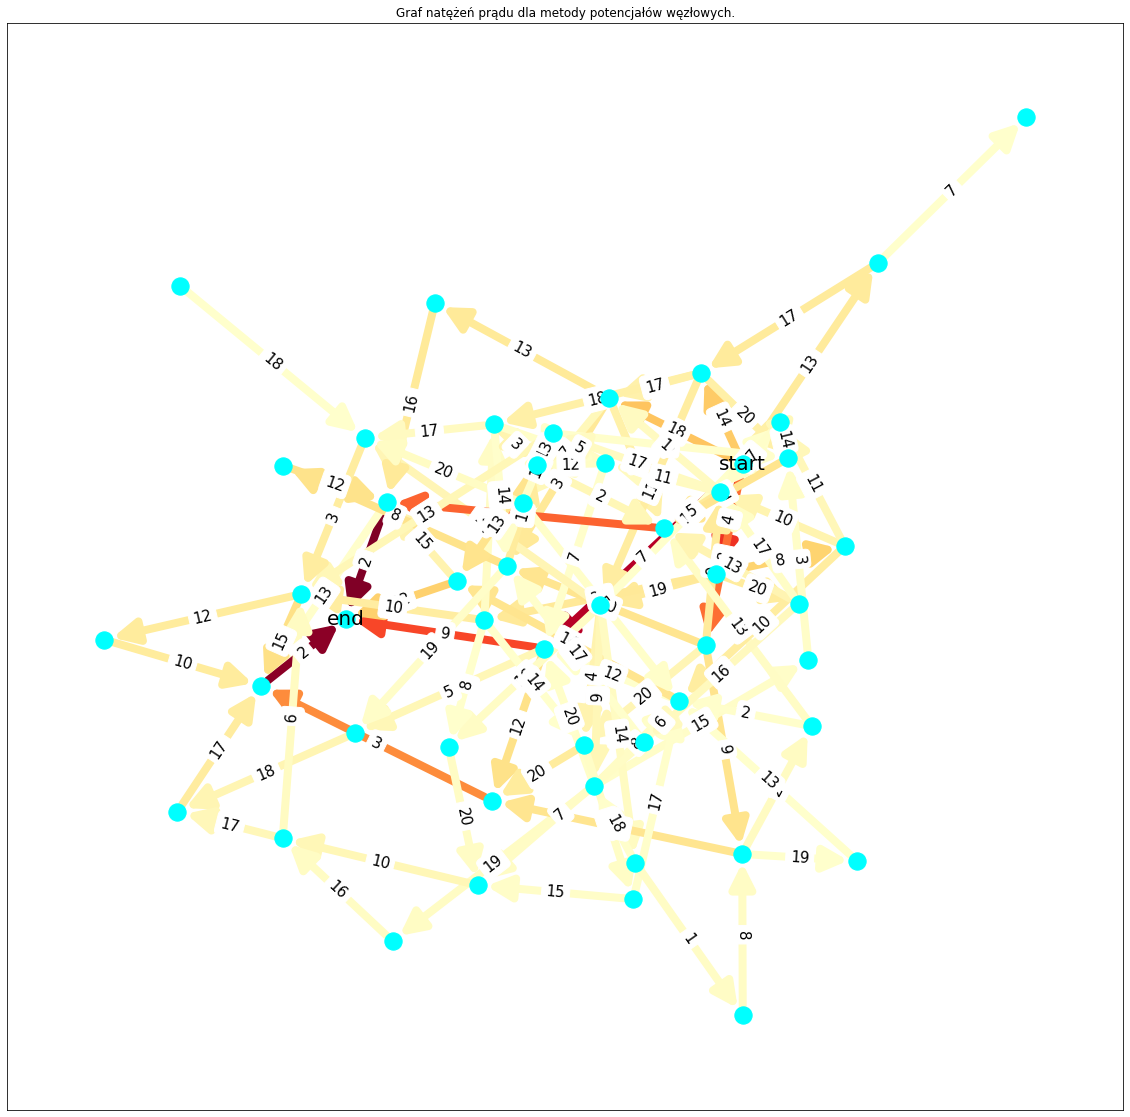

In [21]:
size = 50
p = 0.08
file_path = "ER_graph_2.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=2, E=230, pos = nx.spring_layout(G))


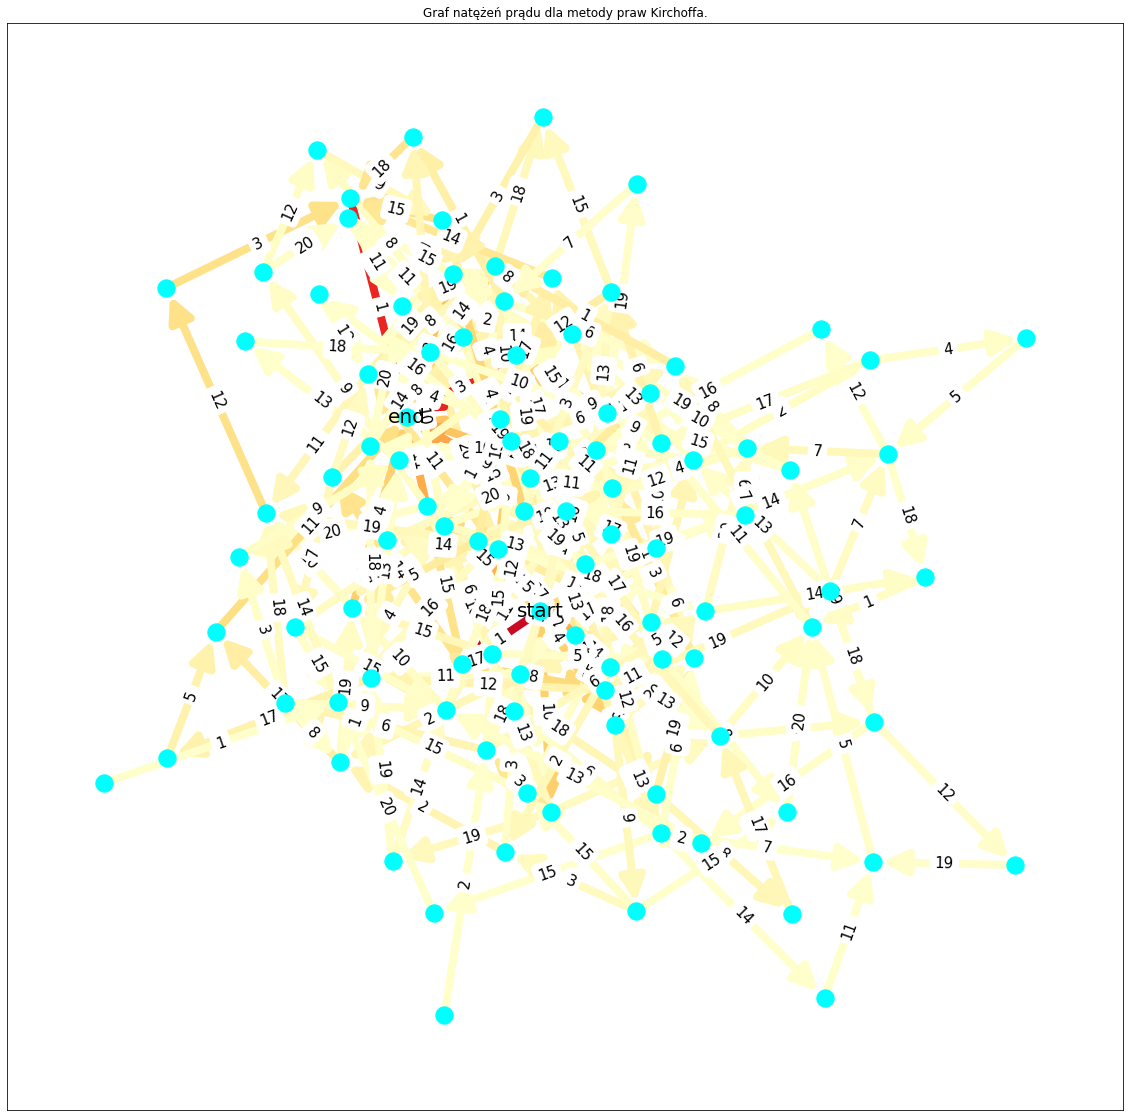

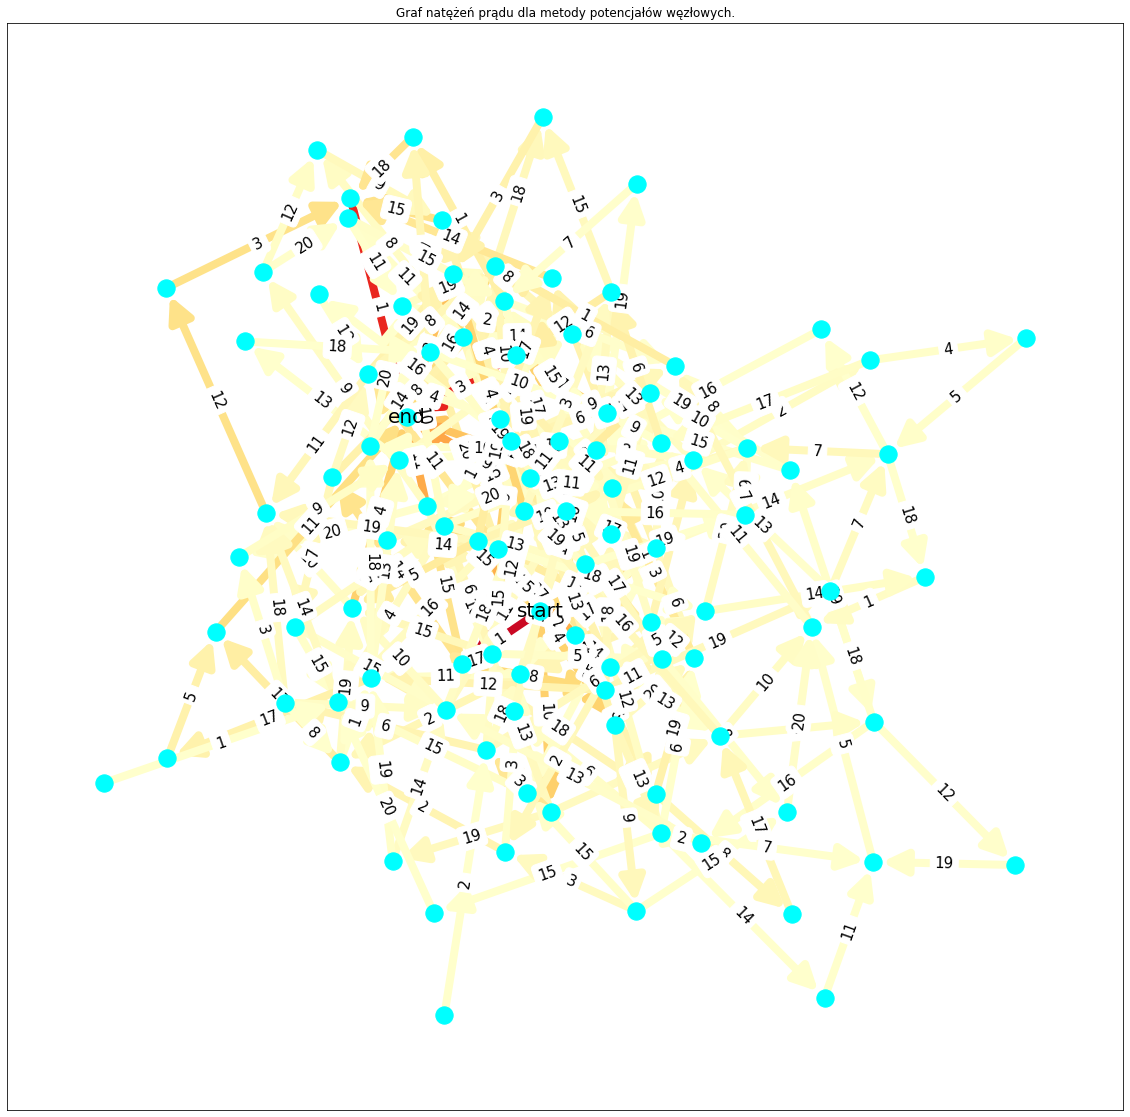

In [40]:
size = 100
p = 0.05
file_path = "ER_graph_3.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=2, E=230, pos = nx.spring_layout(G))


#### Graf kubiczny

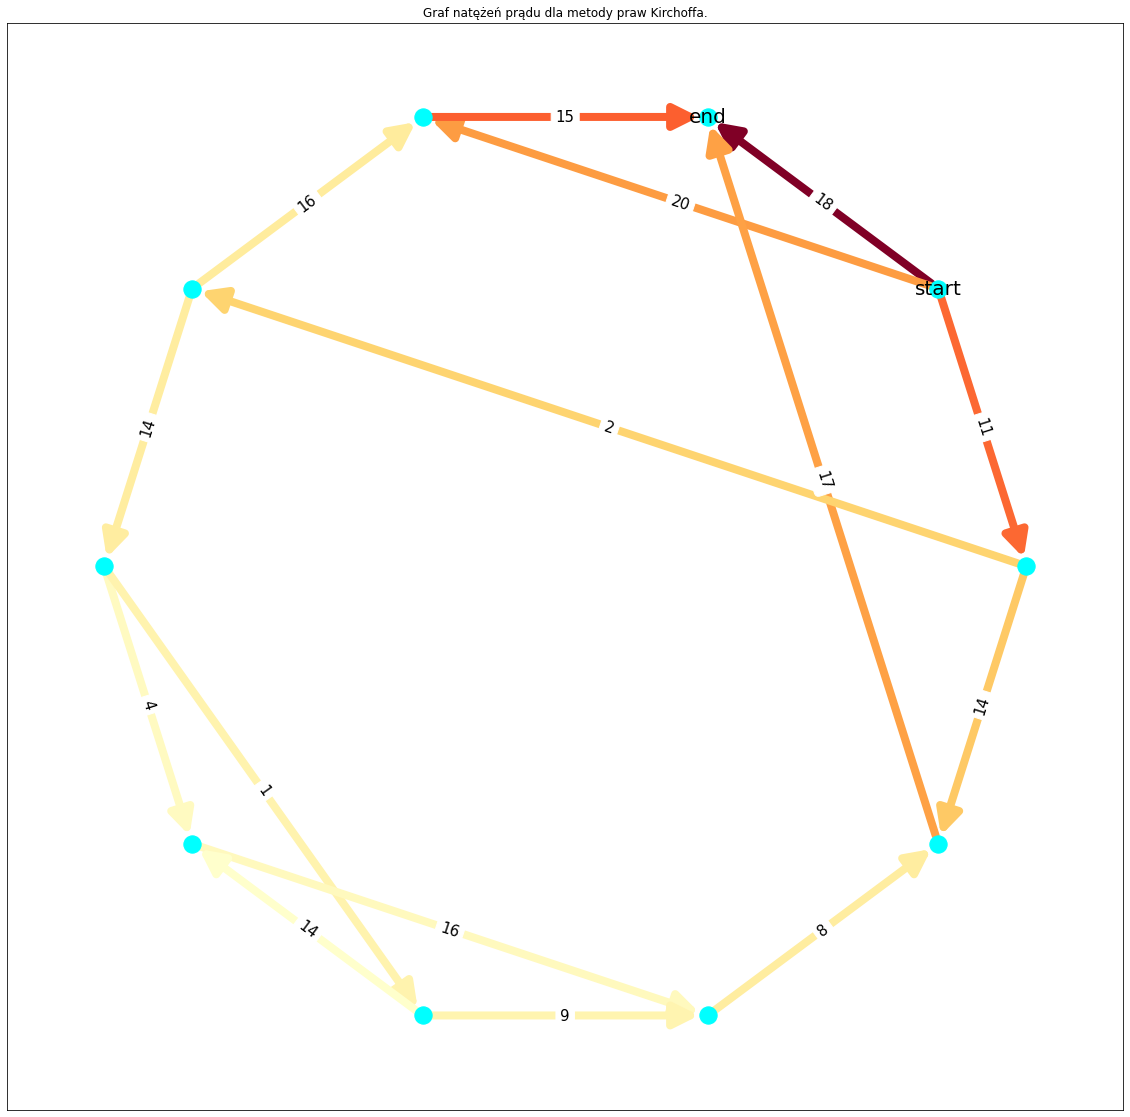

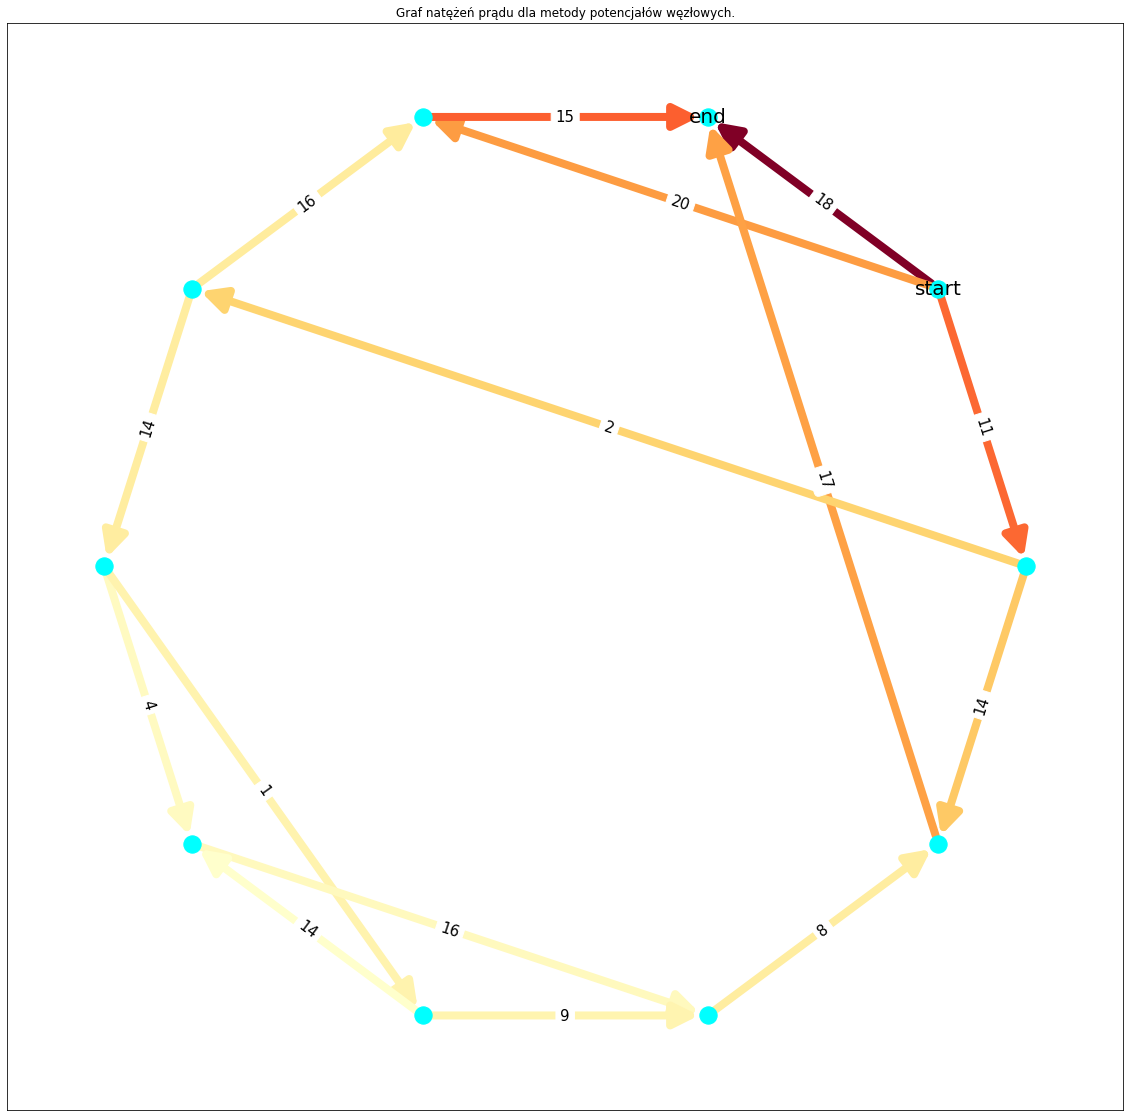

In [43]:
size = 10
file_path = "cubic_graph_1.txt"
file = open (file_path, "w")
V = set()
for i in range (1, size):
    V.add(i)
    w = randint (1, 20)
    line = str(i) + " " + str(i+1) + " " + str(w) + "\n"
    file.write(line)
V.add(size)
w = randint (1, 20)
line = str(1) + " " + str(size) + " " + str(w) + "\n"
file.write(line)

while len(V) > 0:
    u = sample(V, 1)[0]
    V.remove(u)
    v = sample(V, 1)[0]
    while (abs(u-v)==1 or (u==1 and v == size) or (u==size and v==1)):
        v = sample(V,1)[0]
    V.remove(v)
    if (len(V)==2):
        i, j = tuple(V)
        if (abs(i-j)==1 or (i==1 and j == size) or (i==size and j==1)):
            V.add(u)
            V.add(v)
            continue
            
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

p = np.linspace(0, 2*pi, size+1)
pos = {}
for i in range (1, size+1):
    alfa = p[i]
    pos[i] = (cos(alfa), sin(alfa))


calculate_circuit(file_path = file_path, s=1, t=2, E=230, pos = pos)

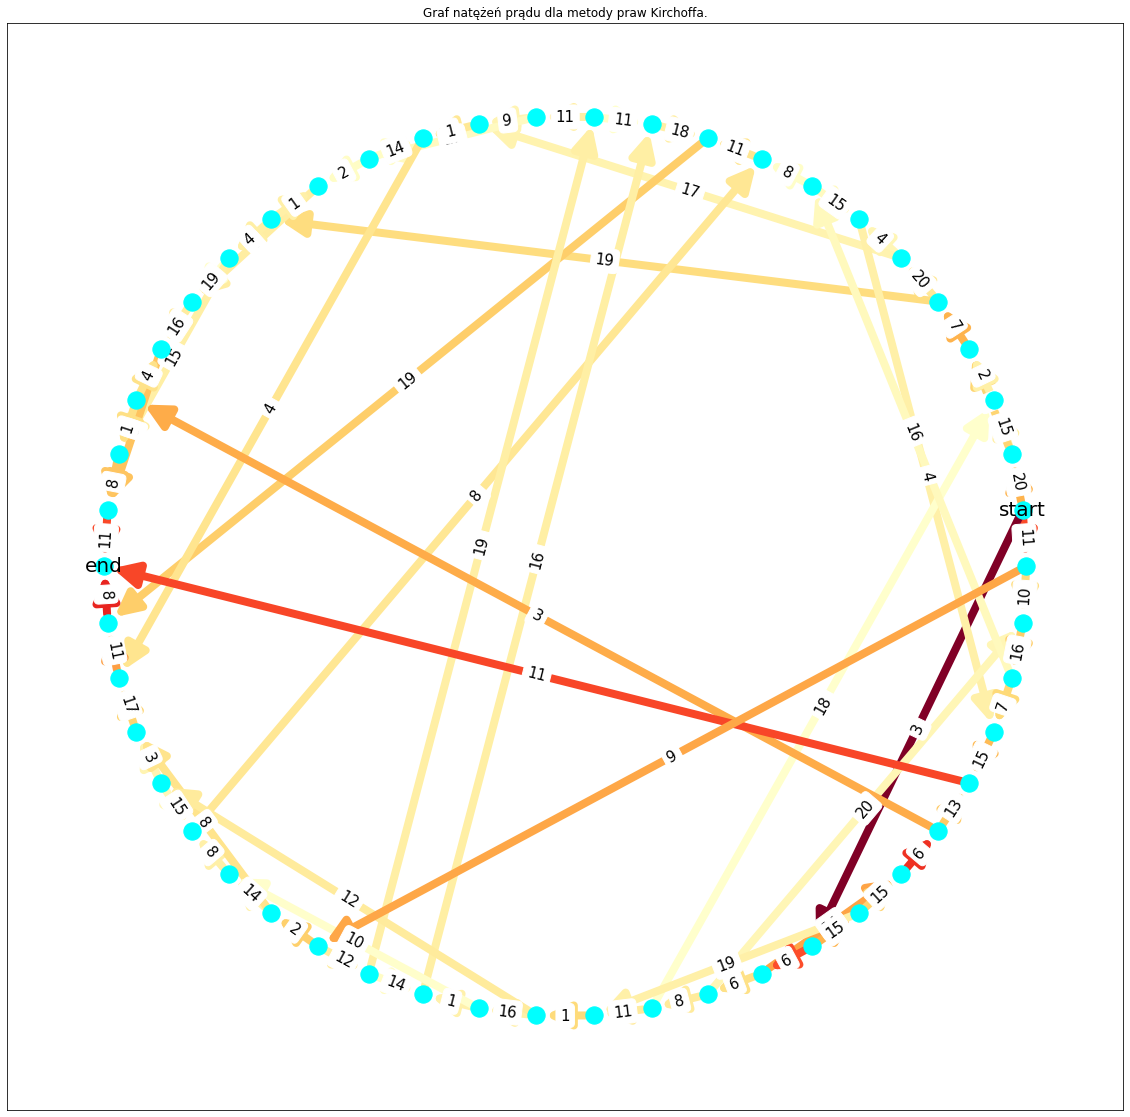

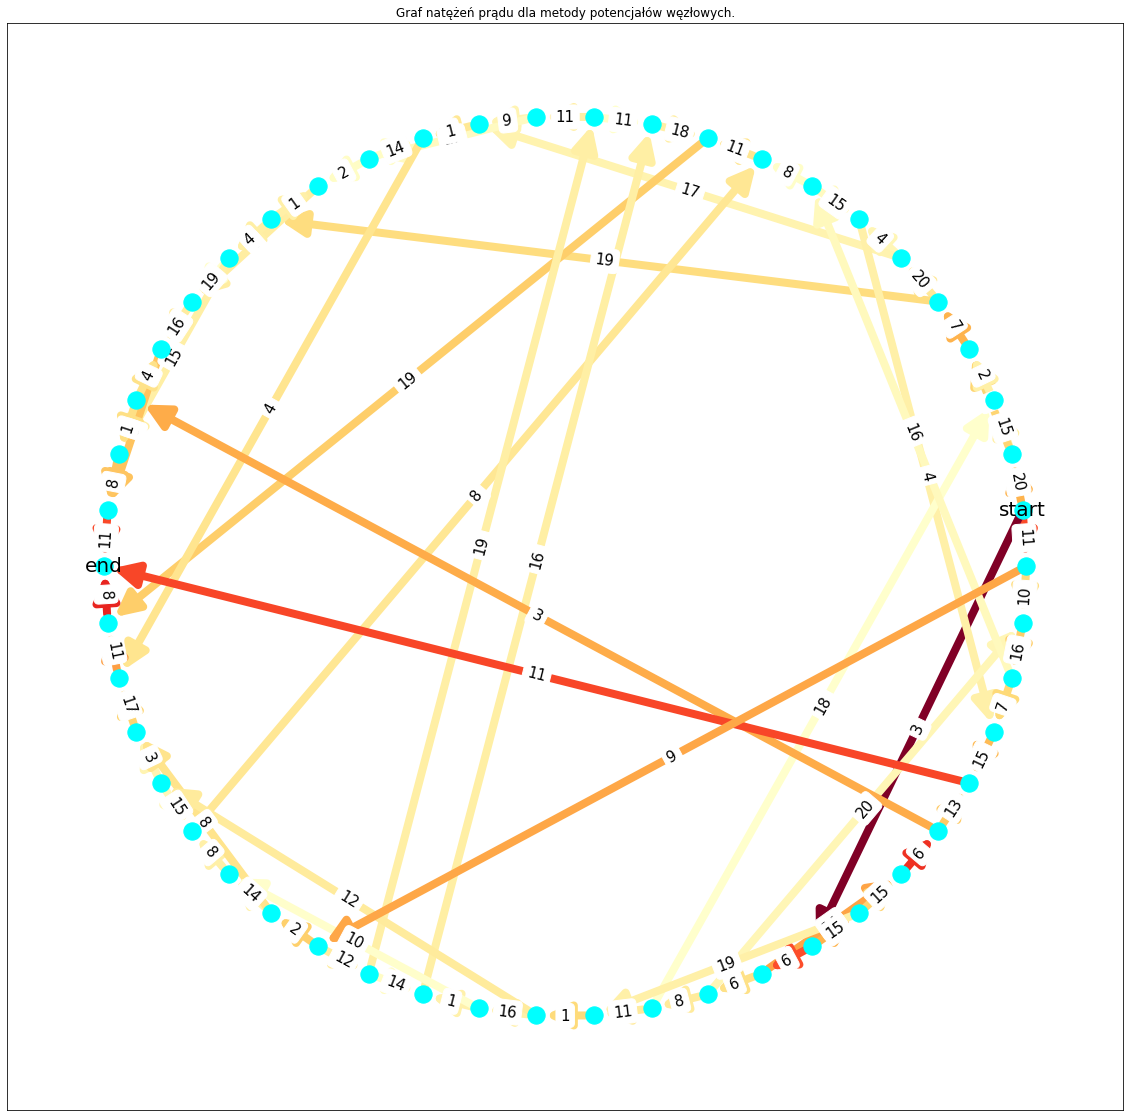

In [24]:
size = 50
file_path = "cubic_graph_2.txt"
file = open (file_path, "w")
V = set()
for i in range (1, size):
    V.add(i)
    w = randint (1, 20)
    line = str(i) + " " + str(i+1) + " " + str(w) + "\n"
    file.write(line)
V.add(size)
w = randint (1, 20)
line = str(1) + " " + str(size) + " " + str(w) + "\n"
file.write(line)

while len(V) > 0:
    u = sample(V, 1)[0]
    V.remove(u)
    v = sample(V, 1)[0]
    while (abs(u-v)==1 or (u==1 and v == size) or (u==size and v==1)):
        v = sample(V,1)[0]
    V.remove(v)
    if (len(V)==2):
        i, j = tuple(V)
        if (abs(i-j)==1 or (i==1 and j == size) or (i==size and j==1)):
            V.add(u)
            V.add(v)
            continue
            
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

p = np.linspace(0, 2*pi, size+1)
pos = {}
for i in range (1, size+1):
    alfa = p[i]
    pos[i] = (cos(alfa), sin(alfa))


calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = pos)

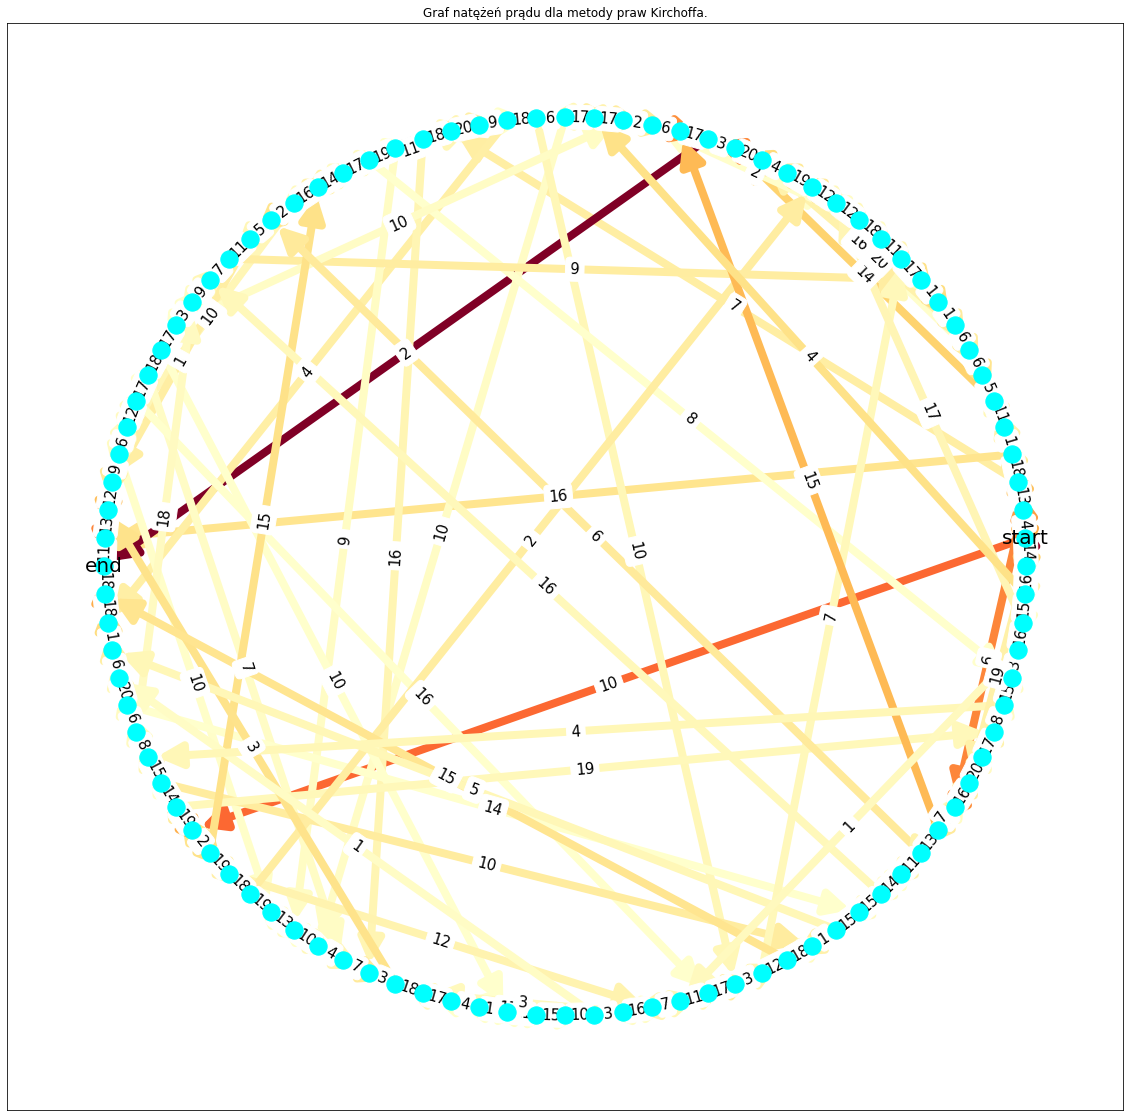

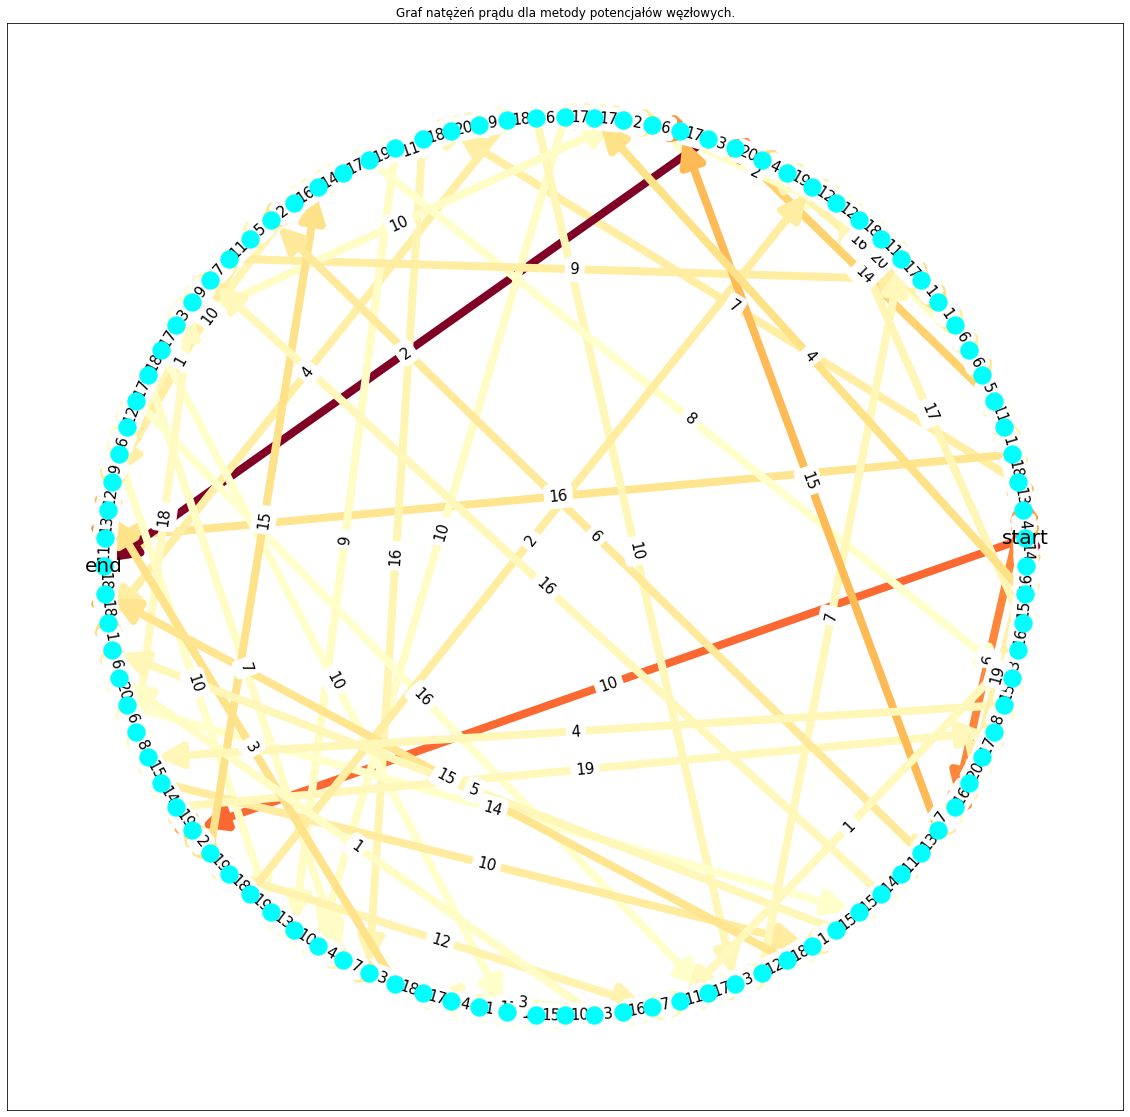

In [25]:
size = 100
file_path = "cubic_graph_3.txt"
file = open (file_path, "w")
V = set()
for i in range (1, size):
    V.add(i)
    w = randint (1, 20)
    line = str(i) + " " + str(i+1) + " " + str(w) + "\n"
    file.write(line)
V.add(size)
w = randint (1, 20)
line = str(1) + " " + str(size) + " " + str(w) + "\n"
file.write(line)

while len(V) > 0:
    u = sample(V, 1)[0]
    V.remove(u)
    v = sample(V, 1)[0]
    while (abs(u-v)==1 or (u==1 and v == size) or (u==size and v==1)):
        v = sample(V,1)[0]
    V.remove(v)
    if (len(V)==2):
        i, j = tuple(V)
        if (abs(i-j)==1 or (i==1 and j == size) or (i==size and j==1)):
            V.add(u)
            V.add(v)
            continue
            
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

p = np.linspace(0, 2*pi, size+1)
pos = {}
for i in range (1, size+1):
    alfa = p[i]
    pos[i] = (cos(alfa), sin(alfa))


calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = pos)

#### Dwa grafy losowe połączone mostkiem

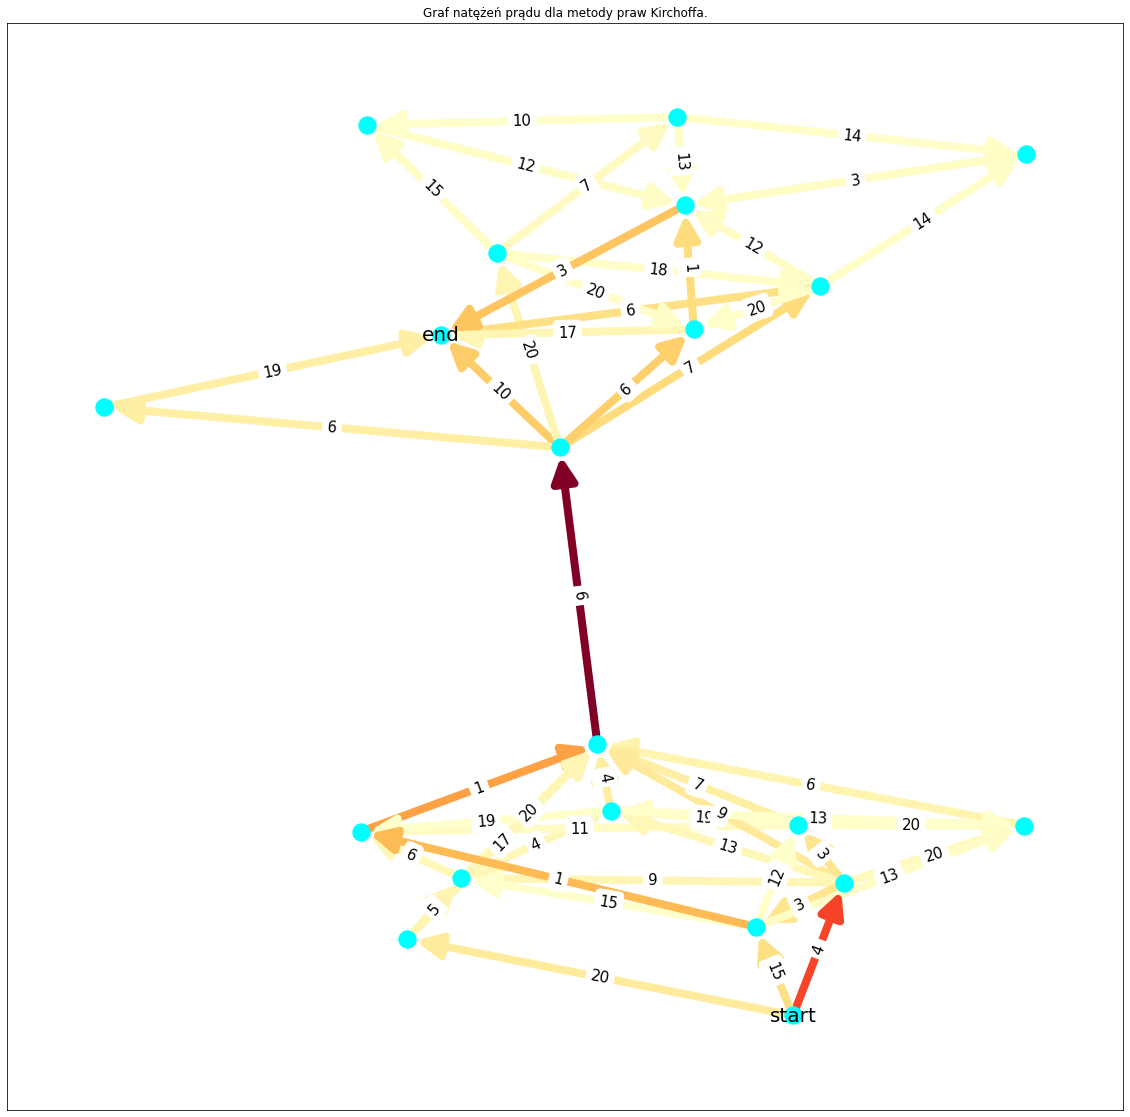

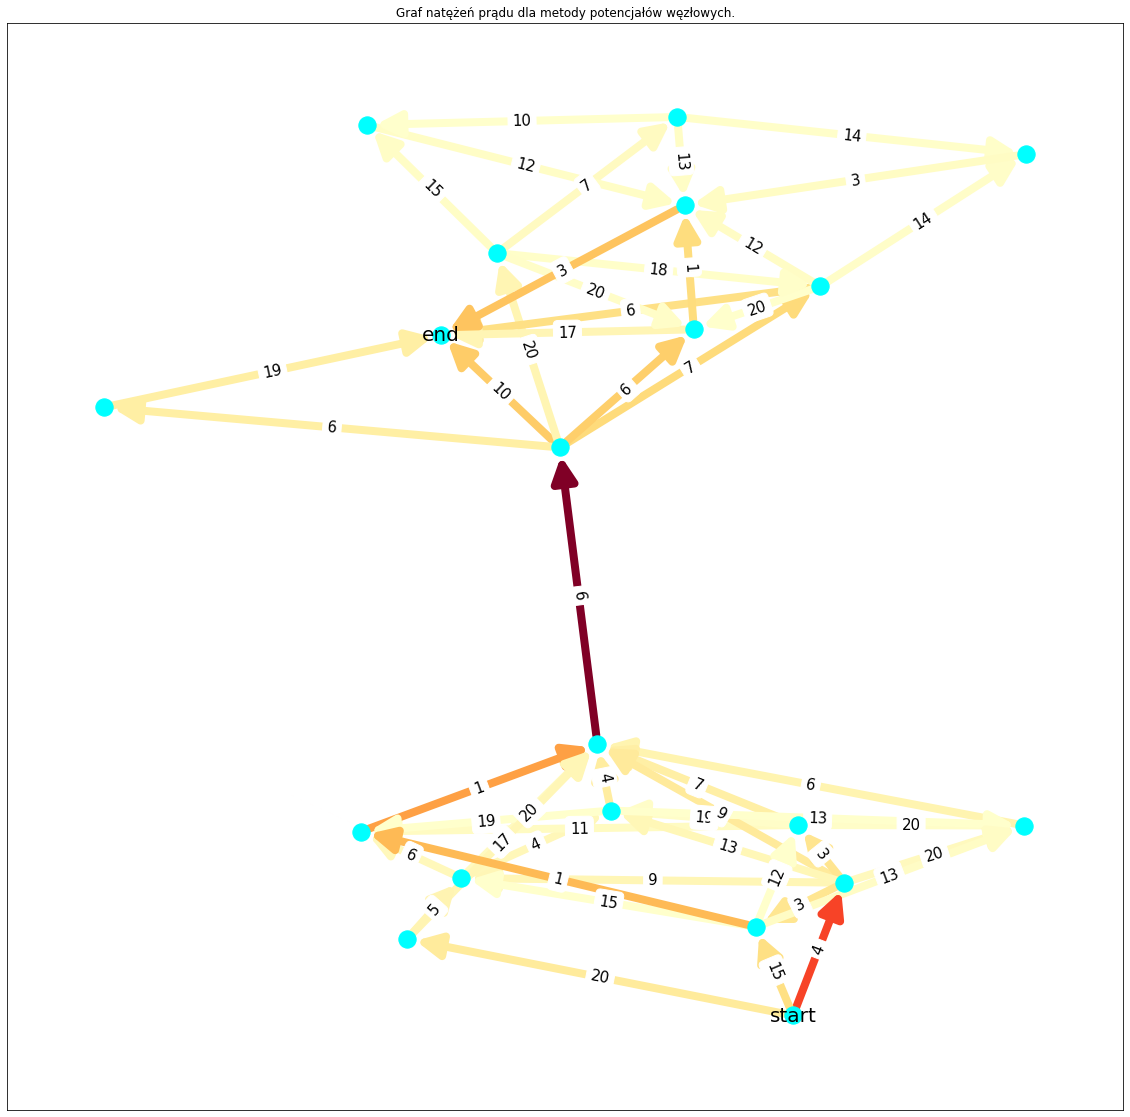

In [44]:
size = 10
p = 0.5
file_path = "ER2_graph_1.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)
G2 = nx.erdos_renyi_graph(size, p)
E2 = make_conec (G2.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
for u, v in E2:
    u+=(size+1)
    v+=(size+1)
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
    
u =1
v = size+1
edg.append((u,v))
w = randint (1, 20)
line = str(u) + " " + str(v) + " " + str(w) + "\n"
file.write(line)

file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=size-3, t=size+3, E=230, pos = nx.spring_layout(G))


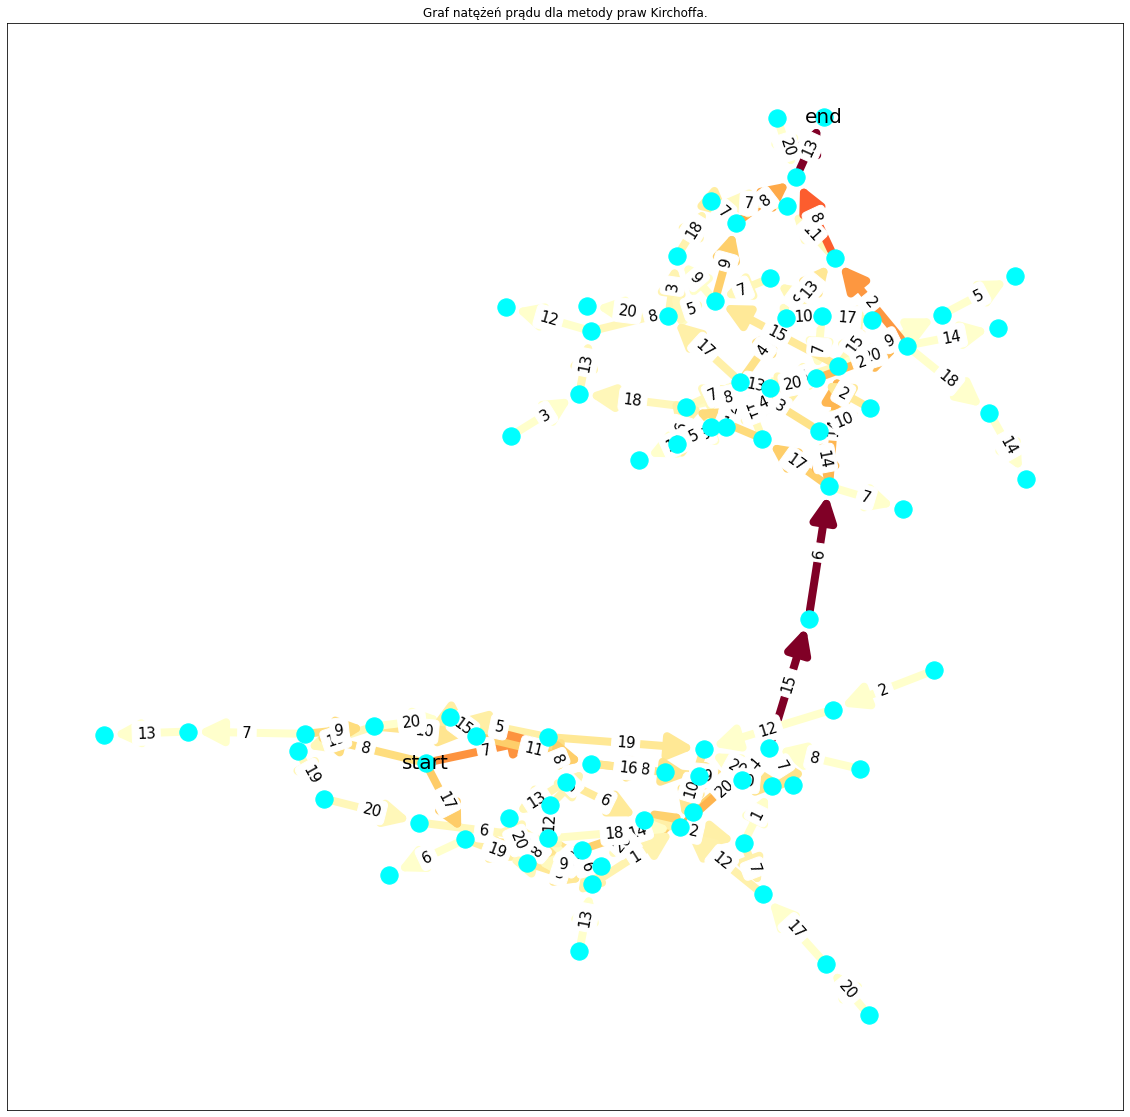

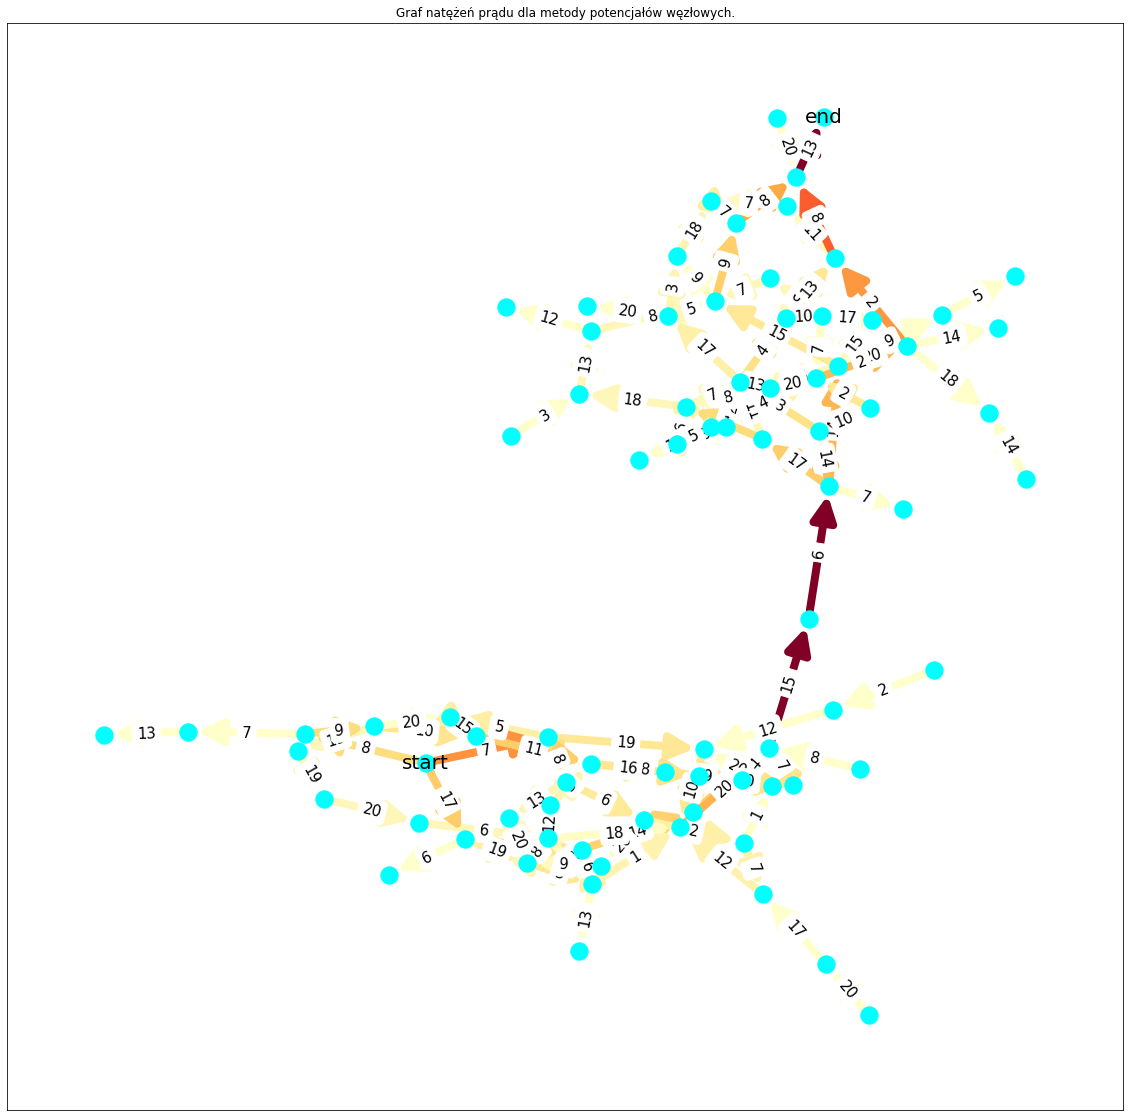

In [27]:
size = 40
p = 0.07
file_path = "ER2_graph_2.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)
G2 = nx.erdos_renyi_graph(size, p)
E2 = make_conec (G2.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
for u, v in E2:
    u+=(size+1)
    v+=(size+1)
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
    
u =1
v = size+1
edg.append((u,v))
w = randint (1, 20)
line = str(u) + " " + str(v) + " " + str(w) + "\n"
file.write(line)

file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=size-3, t=size+3, E=230, pos = nx.spring_layout(G))


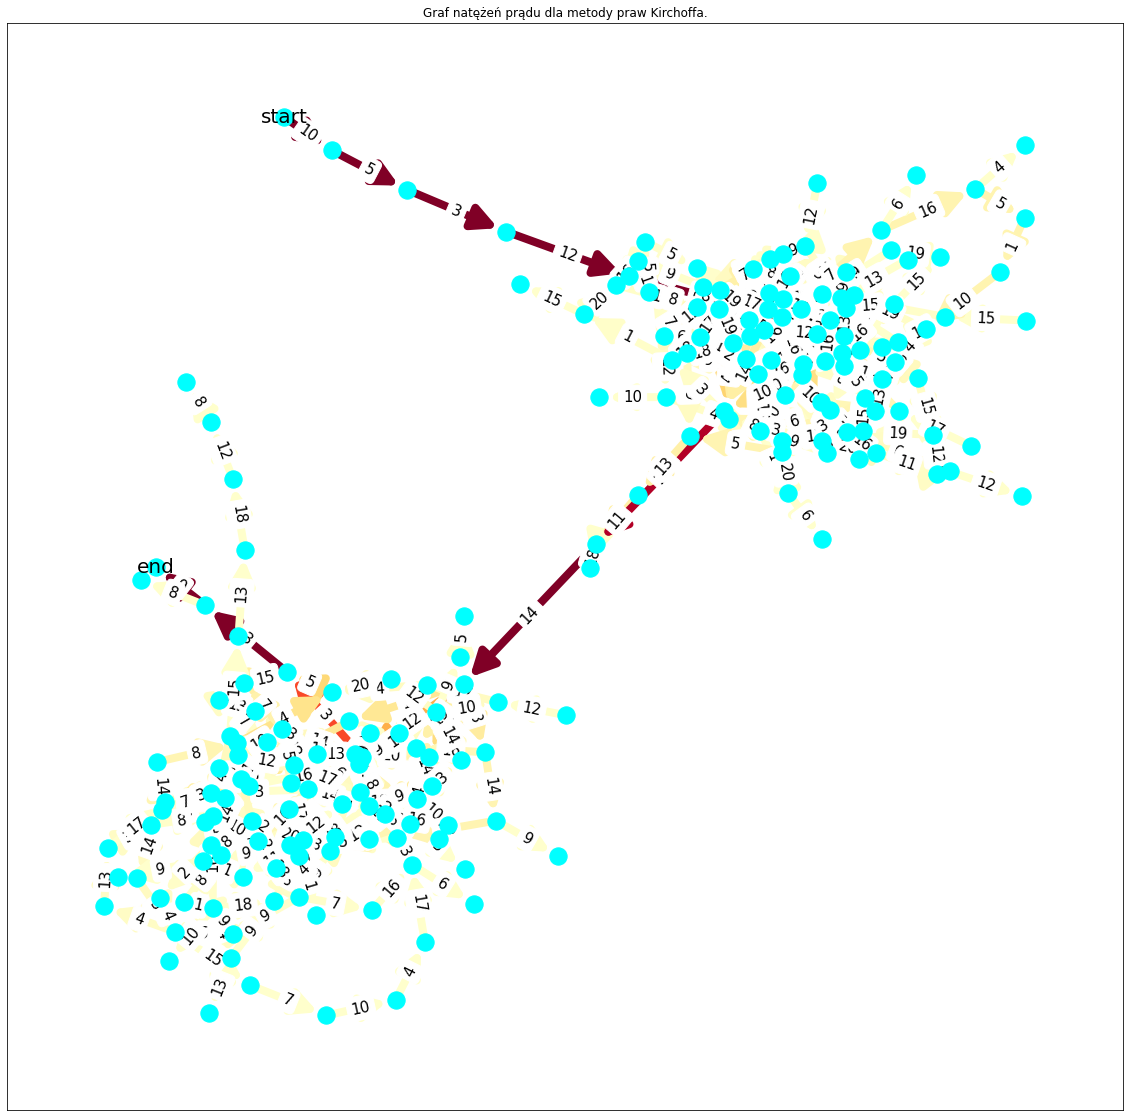

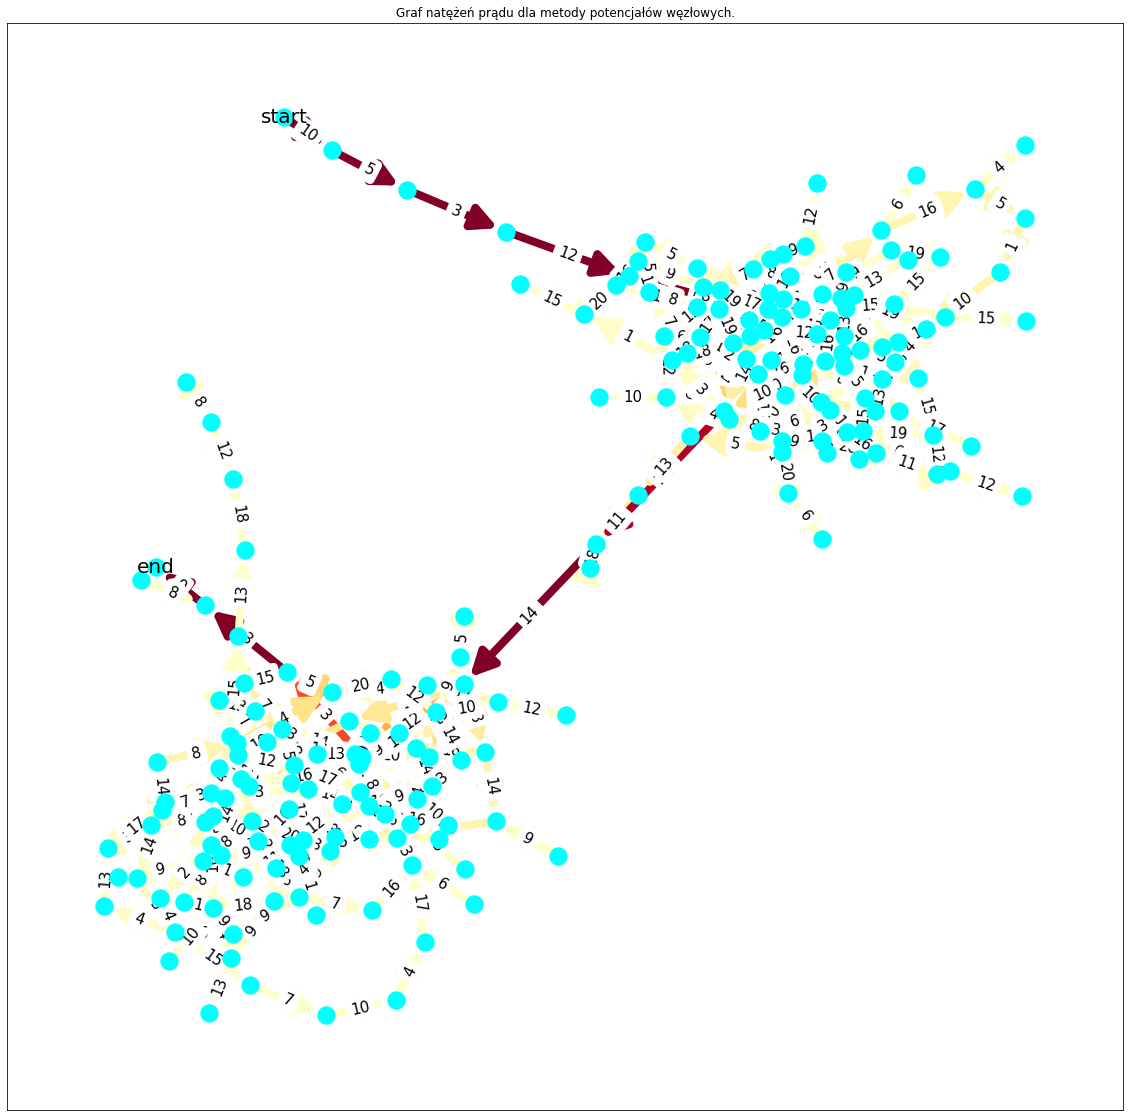

In [28]:
size = 100
p = 0.03
file_path = "ER2_graph_3.txt"

G1 = nx.erdos_renyi_graph(size, p)
E1 = make_conec (G1.edges(), size)
G2 = nx.erdos_renyi_graph(size, p)
E2 = make_conec (G2.edges(), size)

edg = []

file = open (file_path, "w")
for u, v in E1:
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
for u, v in E2:
    u+=(size+1)
    v+=(size+1)
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
    
u =1
v = size+1
edg.append((u,v))
w = randint (1, 20)
line = str(u) + " " + str(v) + " " + str(w) + "\n"
file.write(line)

file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=size-3, t=size+3, E=230, pos = nx.spring_layout(G))


#### Siatka 2D

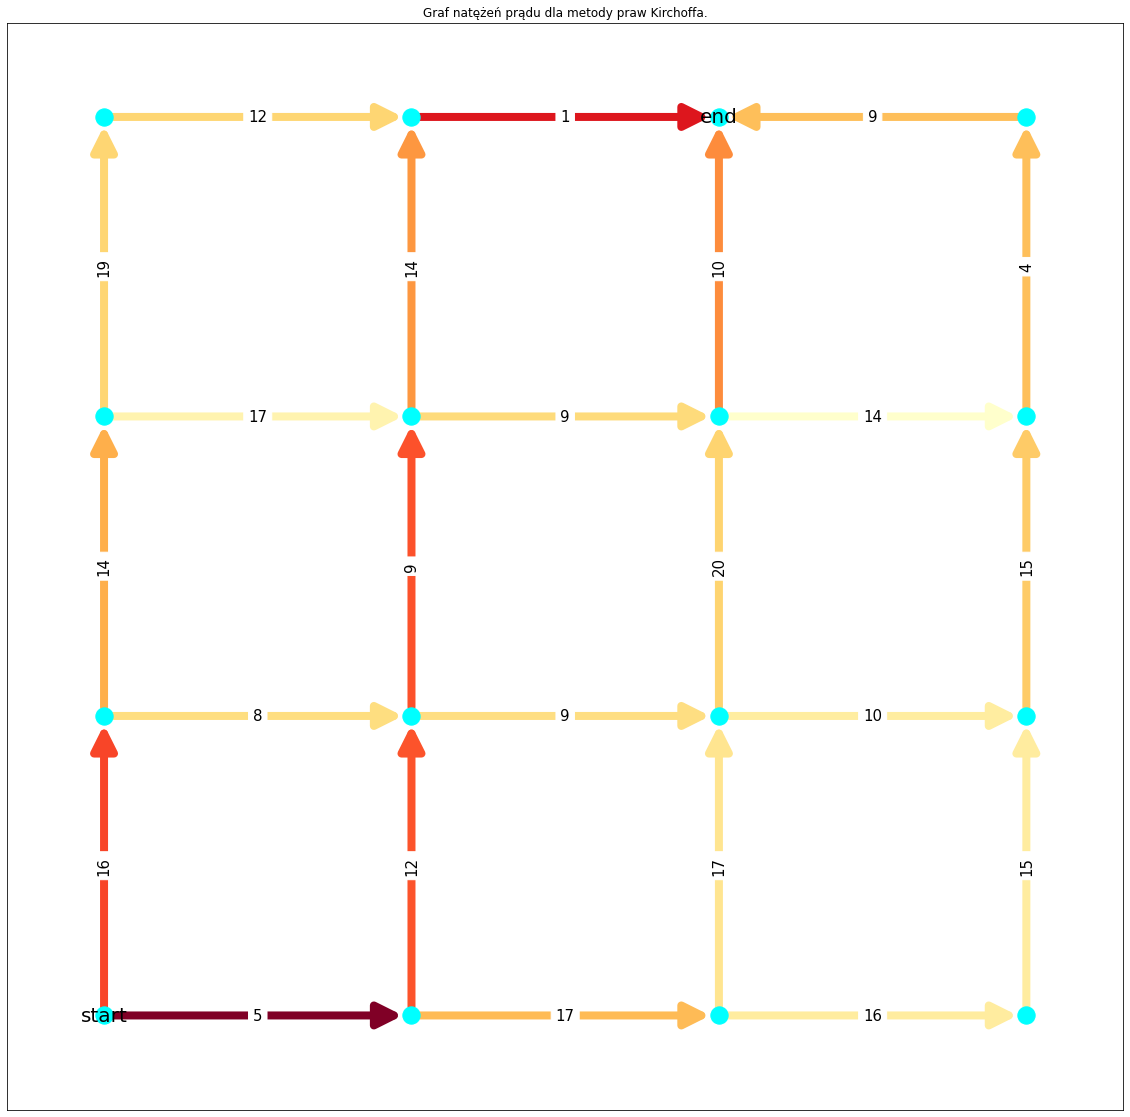

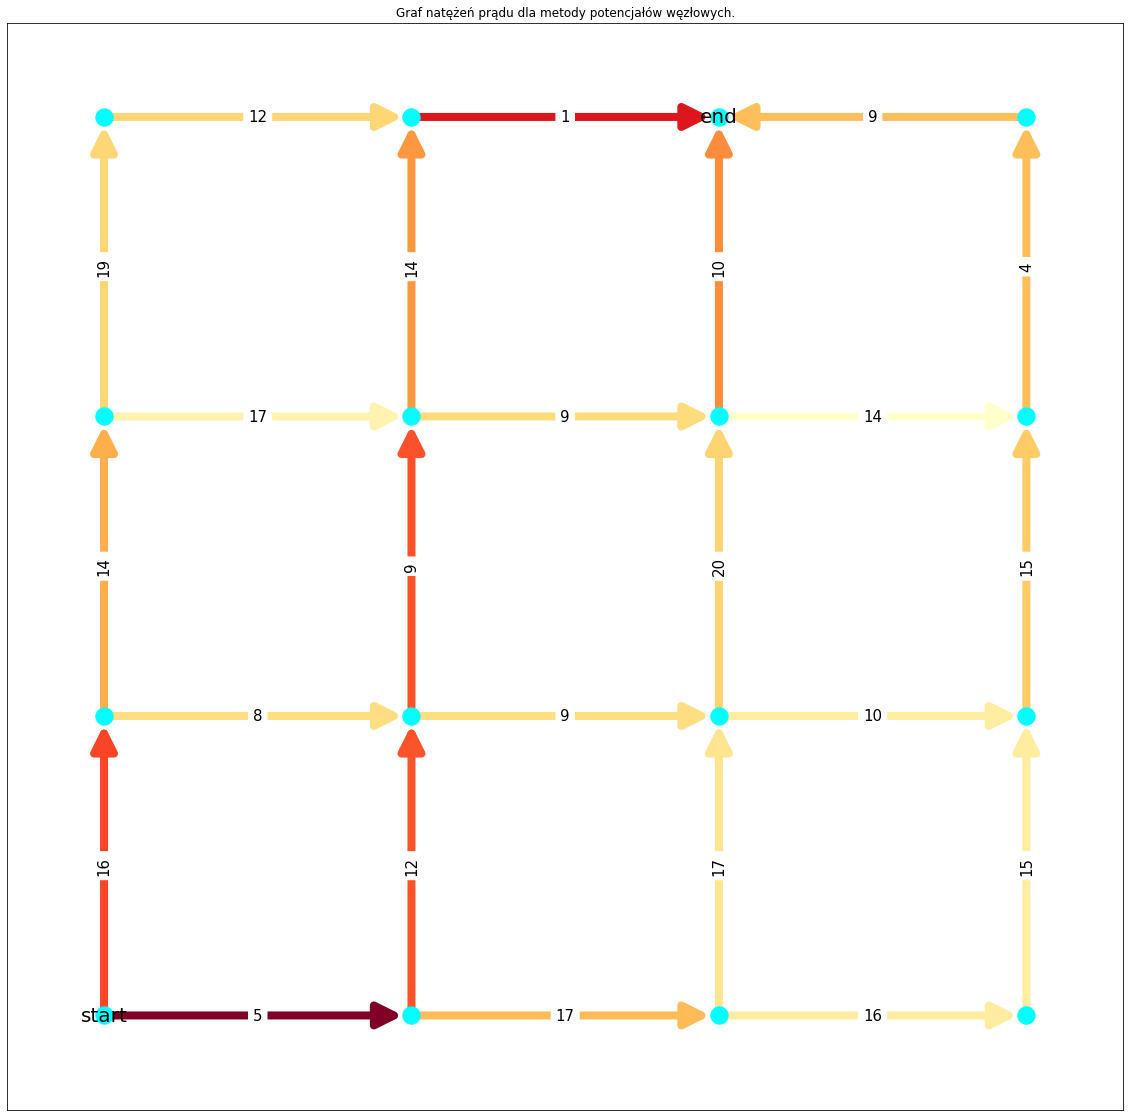

In [29]:
size = 4
file_path = "2d_graph_1.txt"
file = open (file_path, "w")
p = np.linspace(-1, 1, size)
pos = {}
for i in range (1, size*size + 1):
    if i % size != 1:
        w = randint (1, 20)
        line = str(i-1) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
    if i > size:
        w = randint (1, 20)
        line = str(i-size) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
        
    pos[i] = (p[(i-1)%size], p[(i-1)//size])
file.close()

calculate_circuit(file_path = file_path, s=1, t=15, E=230, pos = pos)

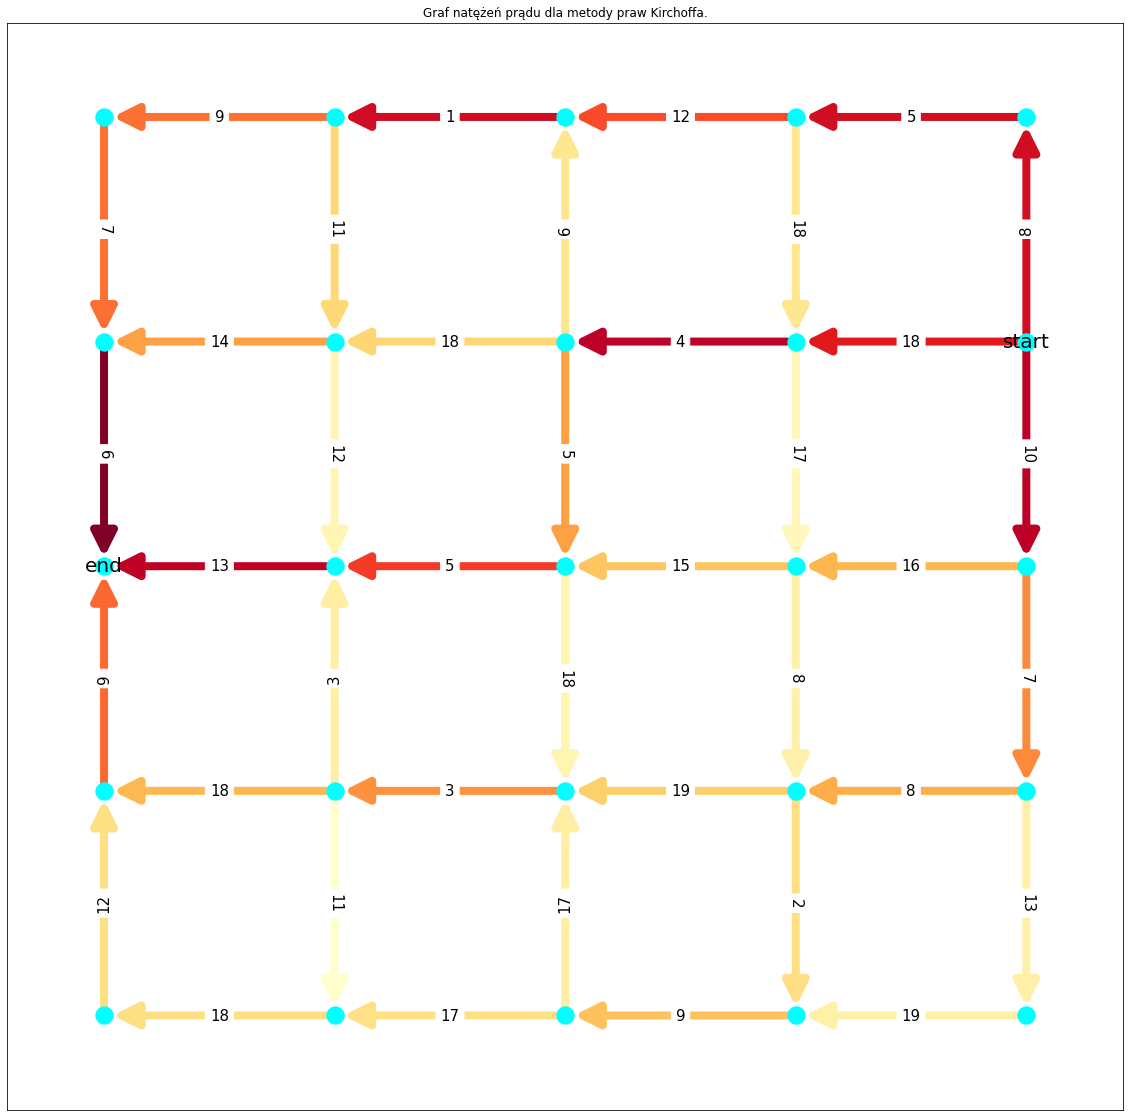

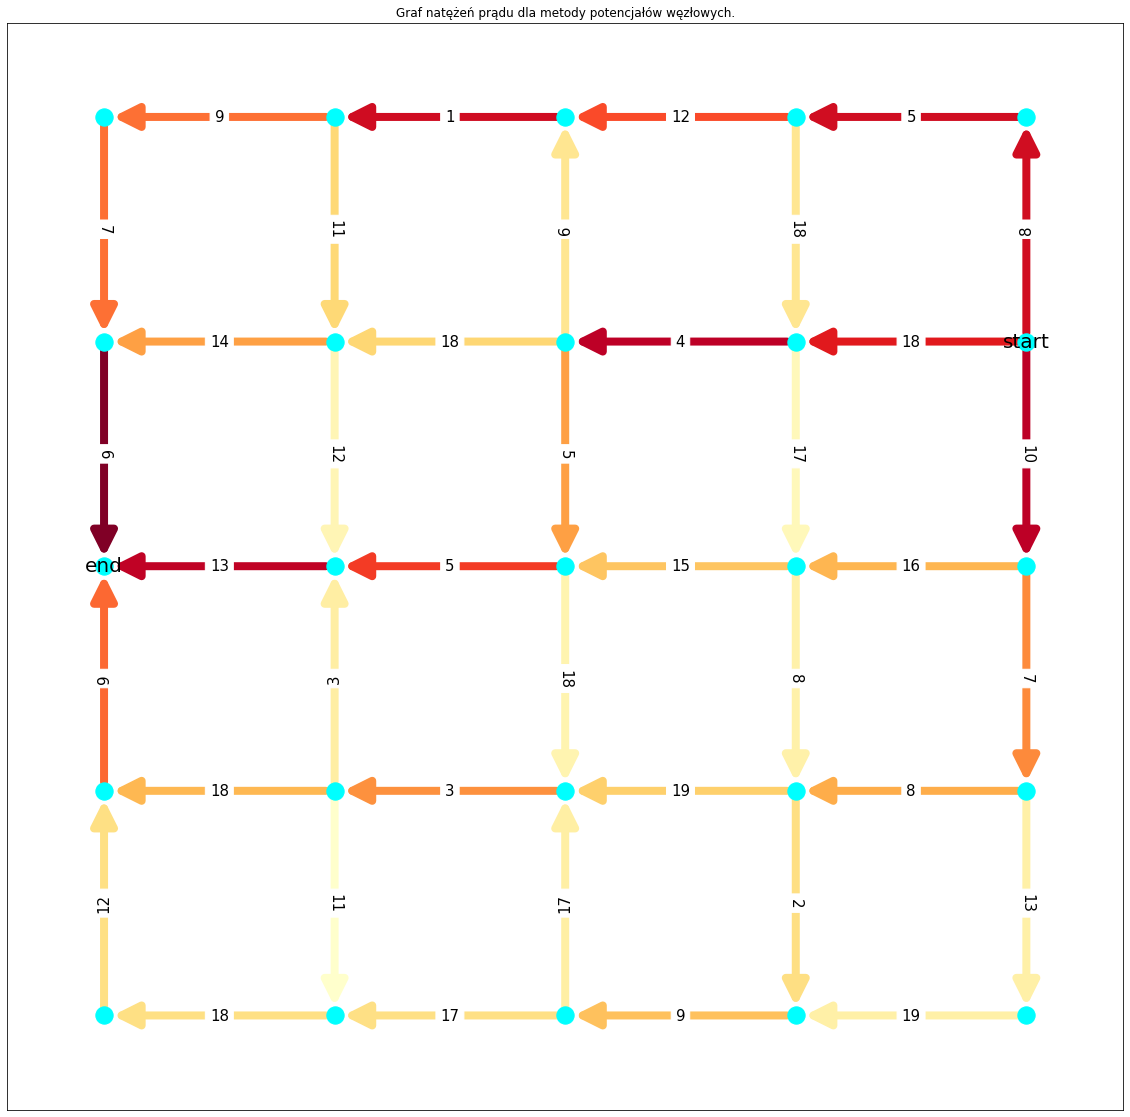

In [30]:
size = 5
file_path = "2d_graph_2.txt"
file = open (file_path, "w")
p = np.linspace(-1, 1, size)
pos = {}
for i in range (1, size*size + 1):
    if i % size != 1:
        w = randint (1, 20)
        line = str(i-1) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
    if i > size:
        w = randint (1, 20)
        line = str(i-size) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
        
    pos[i] = (p[(i-1)%size], p[(i-1)//size])
file.close()

calculate_circuit(file_path = file_path, s=size*(size-1), t=size*(size-3)+1, E=230, pos = pos)

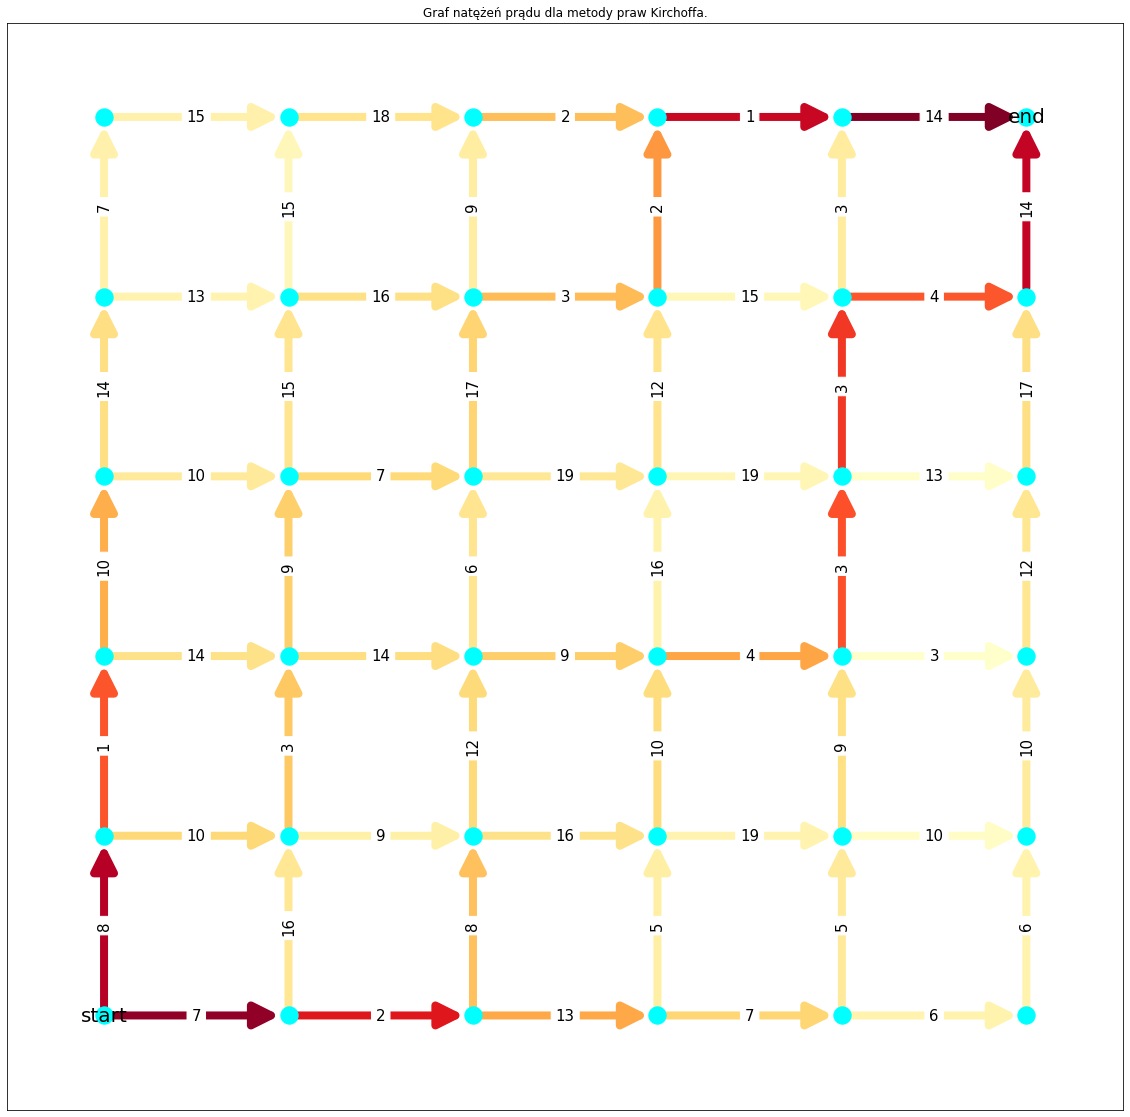

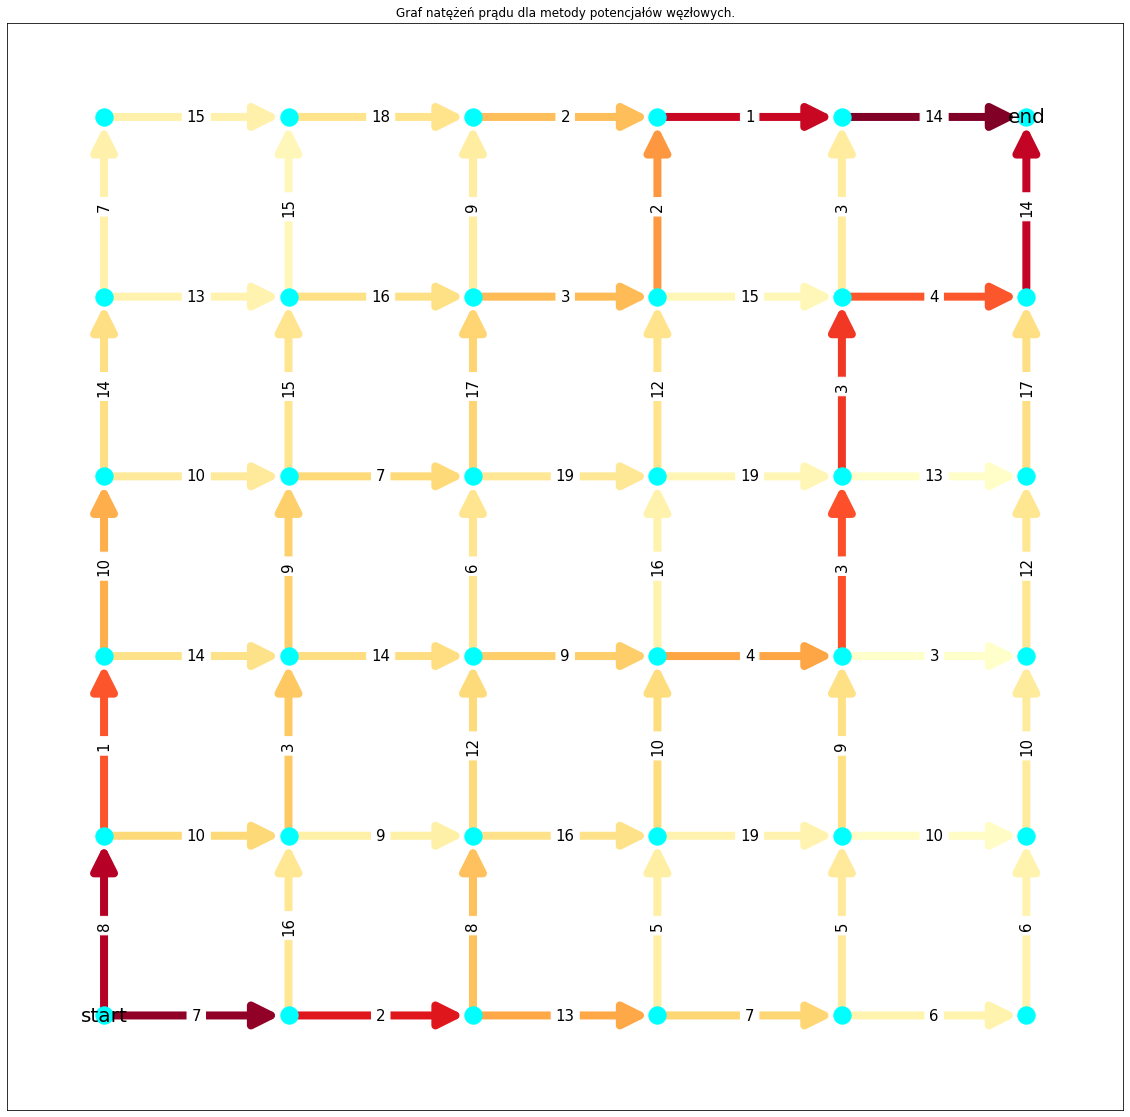

In [31]:
size = 6
file_path = "2d_graph_3.txt"
file = open (file_path, "w")
p = np.linspace(-1, 1, size)
pos = {}
for i in range (1, size*size + 1):
    if i % size != 1:
        w = randint (1, 20)
        line = str(i-1) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
    if i > size:
        w = randint (1, 20)
        line = str(i-size) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
        
    pos[i] = (p[(i-1)%size], p[(i-1)//size])
file.close()

calculate_circuit(file_path = file_path, s=1, t=size*size, E=230, pos = pos)


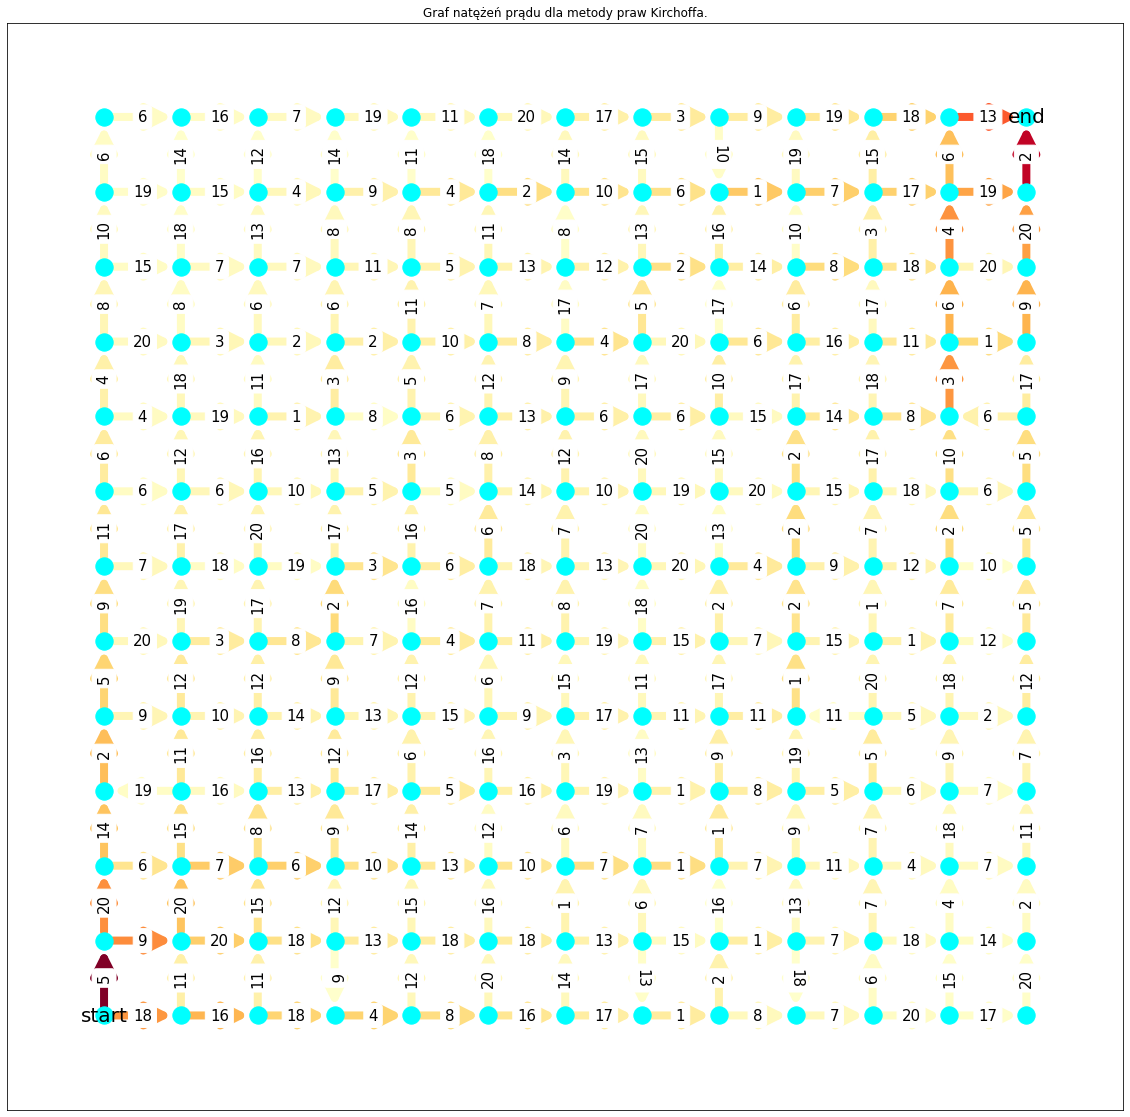

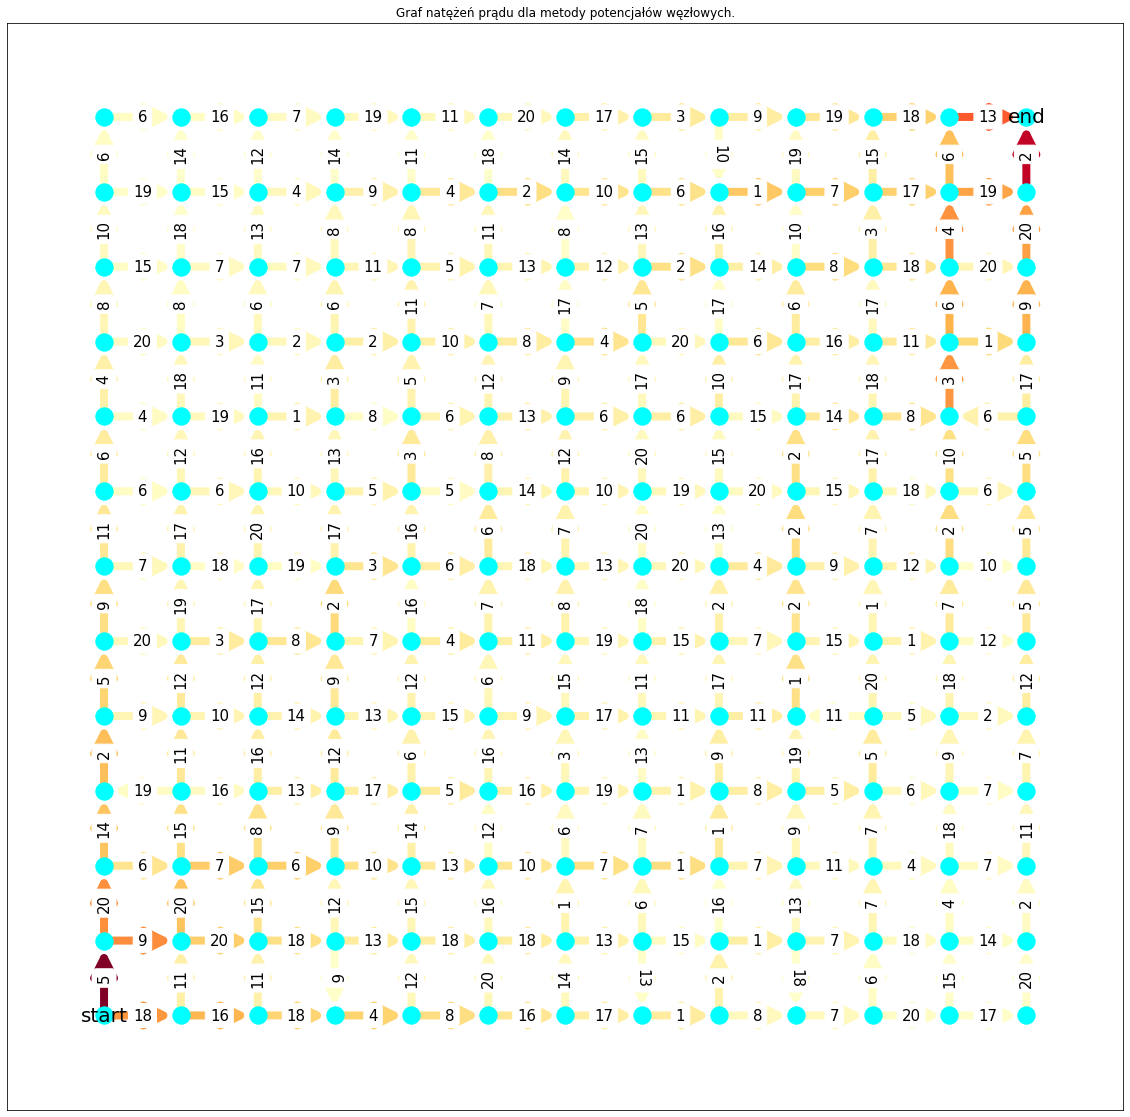

In [32]:
size = 13
file_path = "2d_graph_4.txt"
file = open (file_path, "w")
p = np.linspace(-1, 1, size)
pos = {}
for i in range (1, size*size + 1):
    if i % size != 1:
        w = randint (1, 20)
        line = str(i-1) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
    if i > size:
        w = randint (1, 20)
        line = str(i-size) + " " + str(i) + " " + str(w) + "\n"
        file.write(line)
        
    pos[i] = (p[(i-1)%size], p[(i-1)//size])
file.close()

calculate_circuit(file_path = file_path, s=1, t=size*size, E=230, pos = pos)


#### Typu small-world

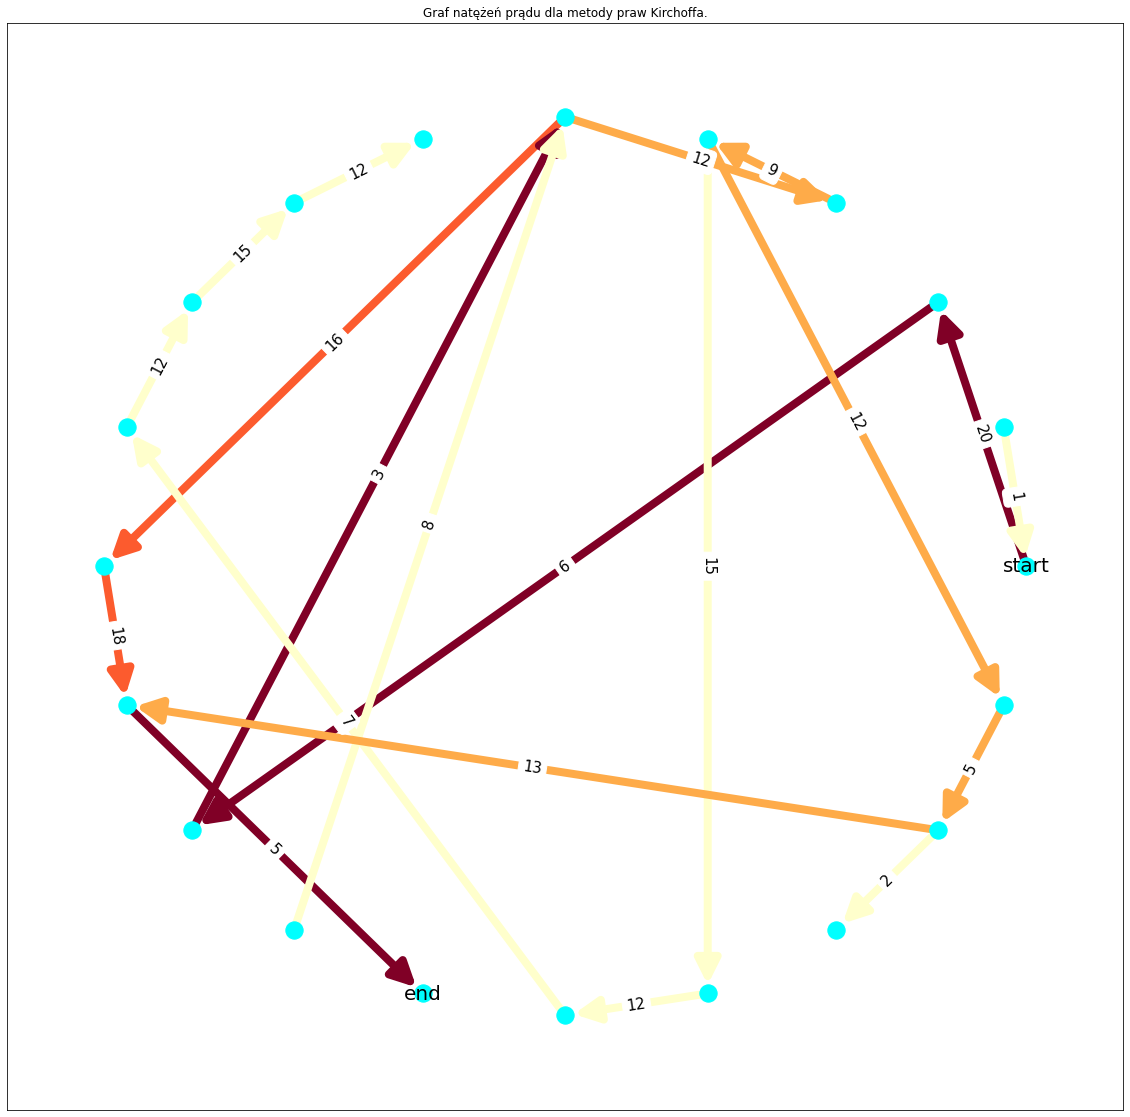

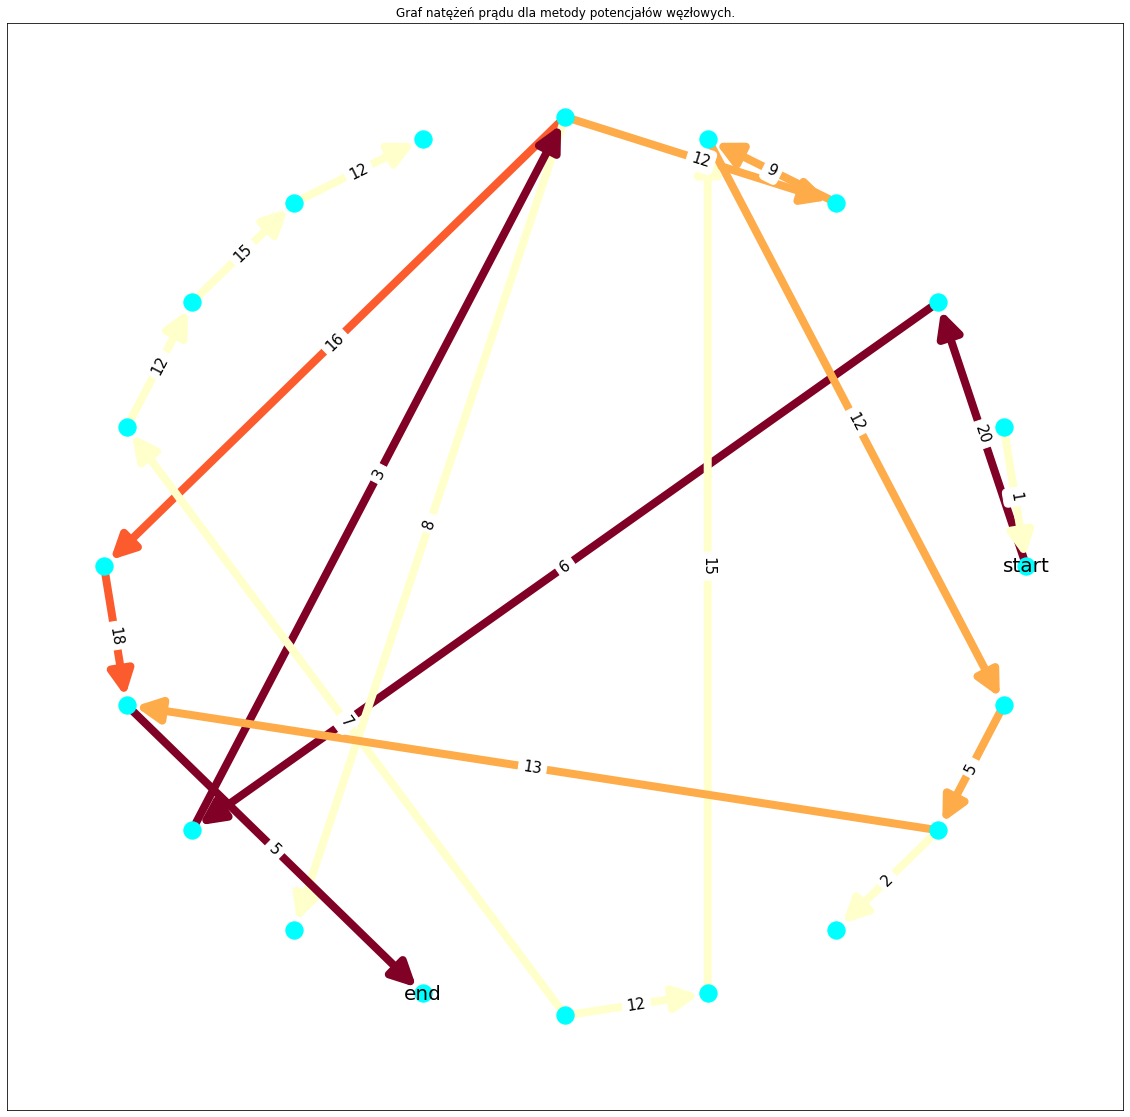

In [45]:
size = 20
k = 3
p = 0.5
file_path = "sw_graph_1.txt"

G1 = nx.connected_watts_strogatz_graph(size, k, p)

edg = []

file = open (file_path, "w")
for u, v in G1.edges():
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = nx.circular_layout(G))


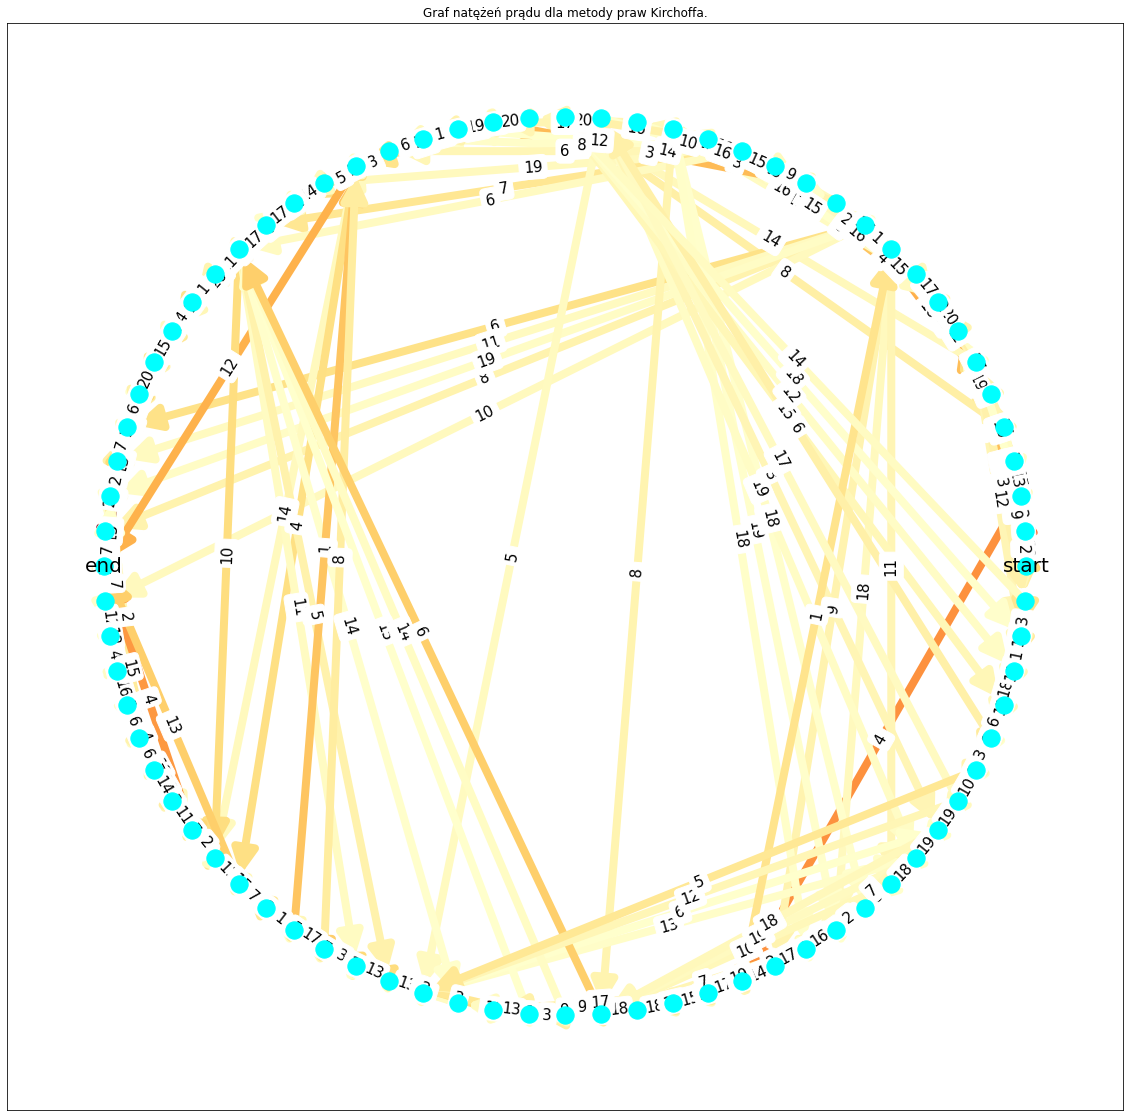

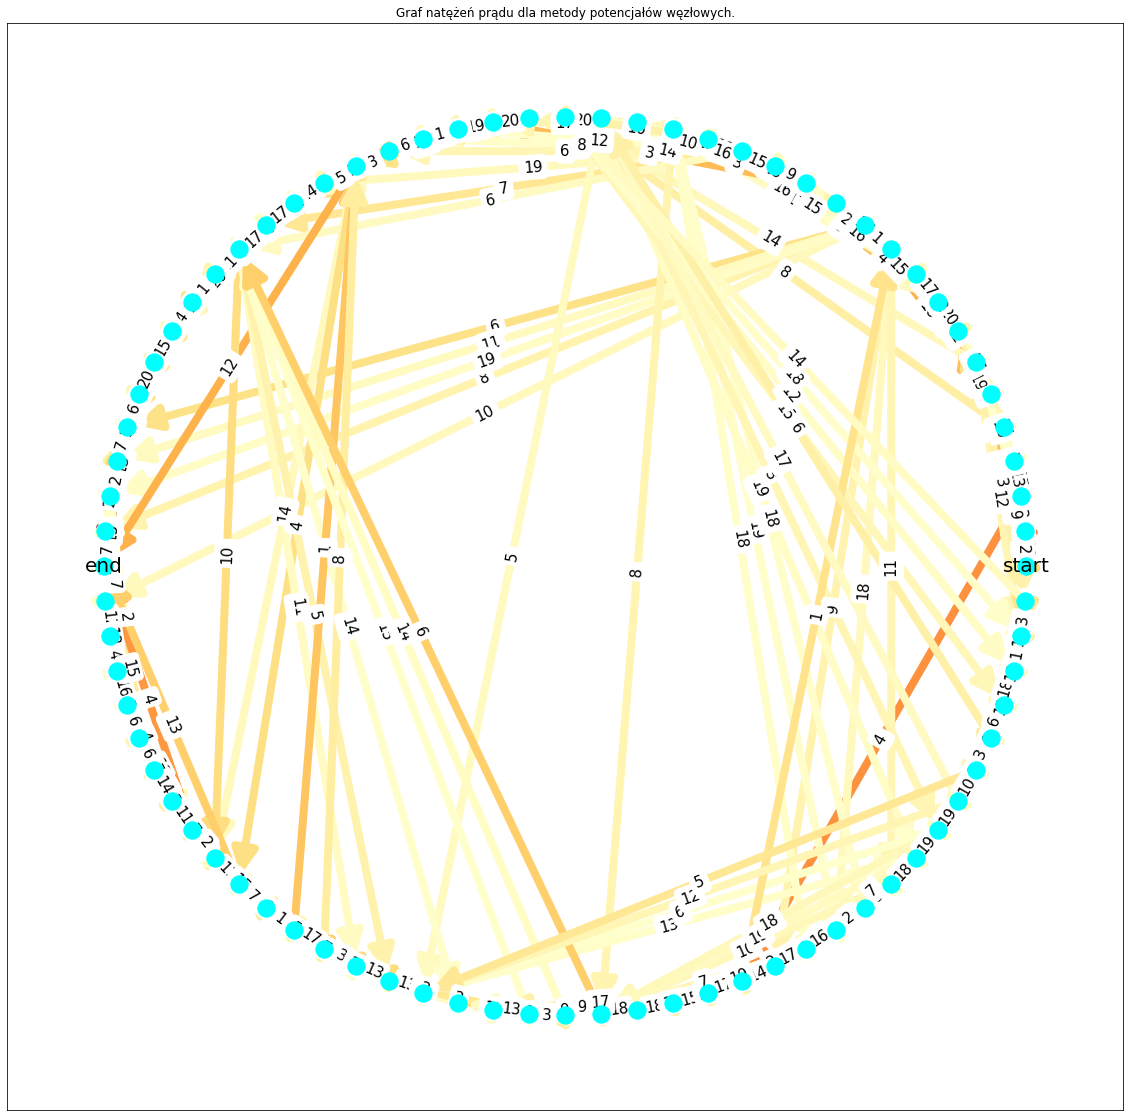

In [34]:
size = 80
k = 7
p = 0.1
file_path = "sw_graph_2.txt"

G1 = nx.connected_watts_strogatz_graph(size, k, p)

edg = []

file = open (file_path, "w")
for u, v in G1.edges():
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = nx.circular_layout(G))

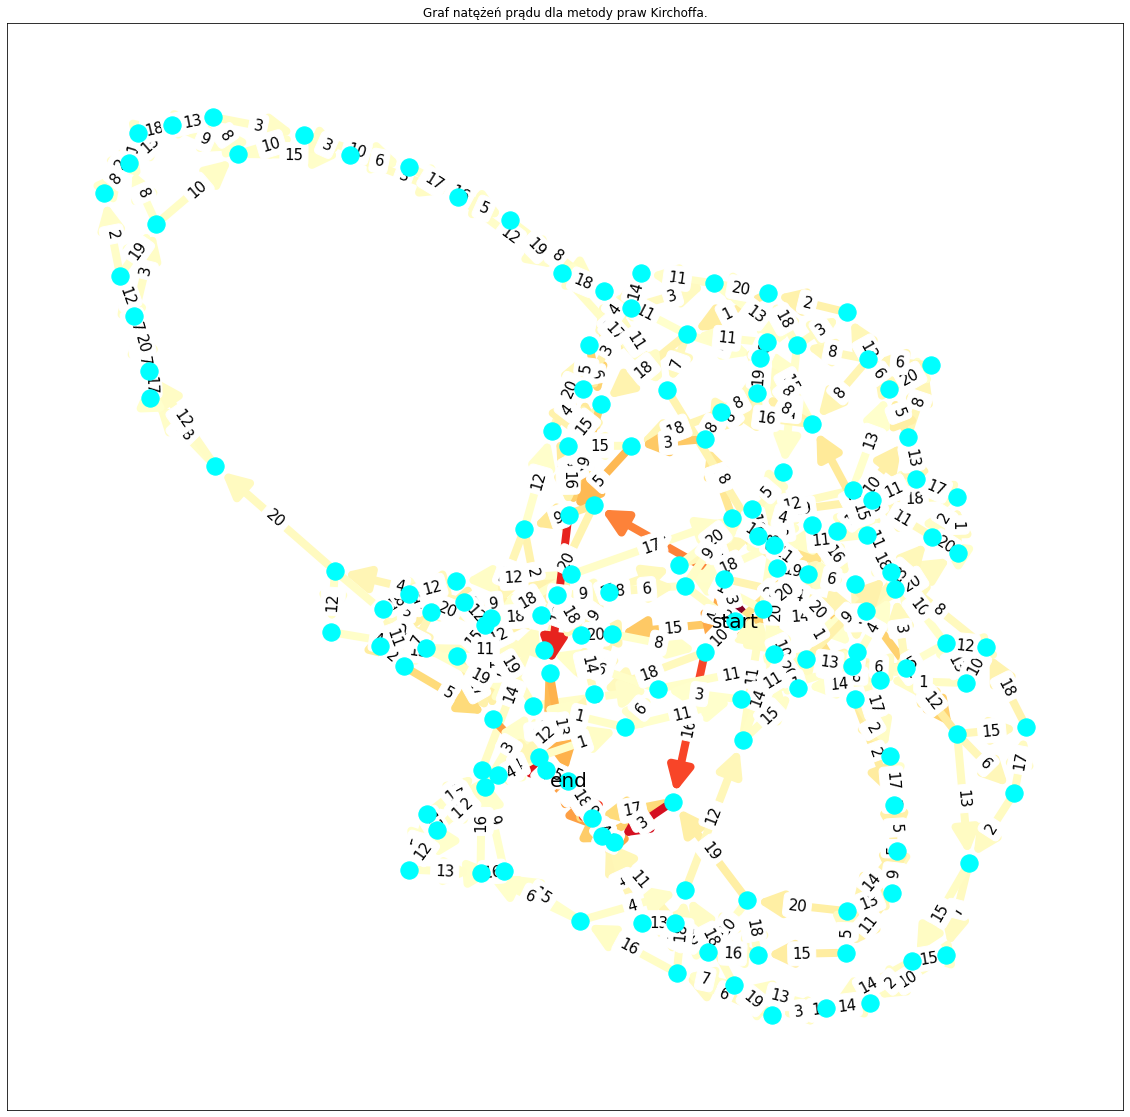

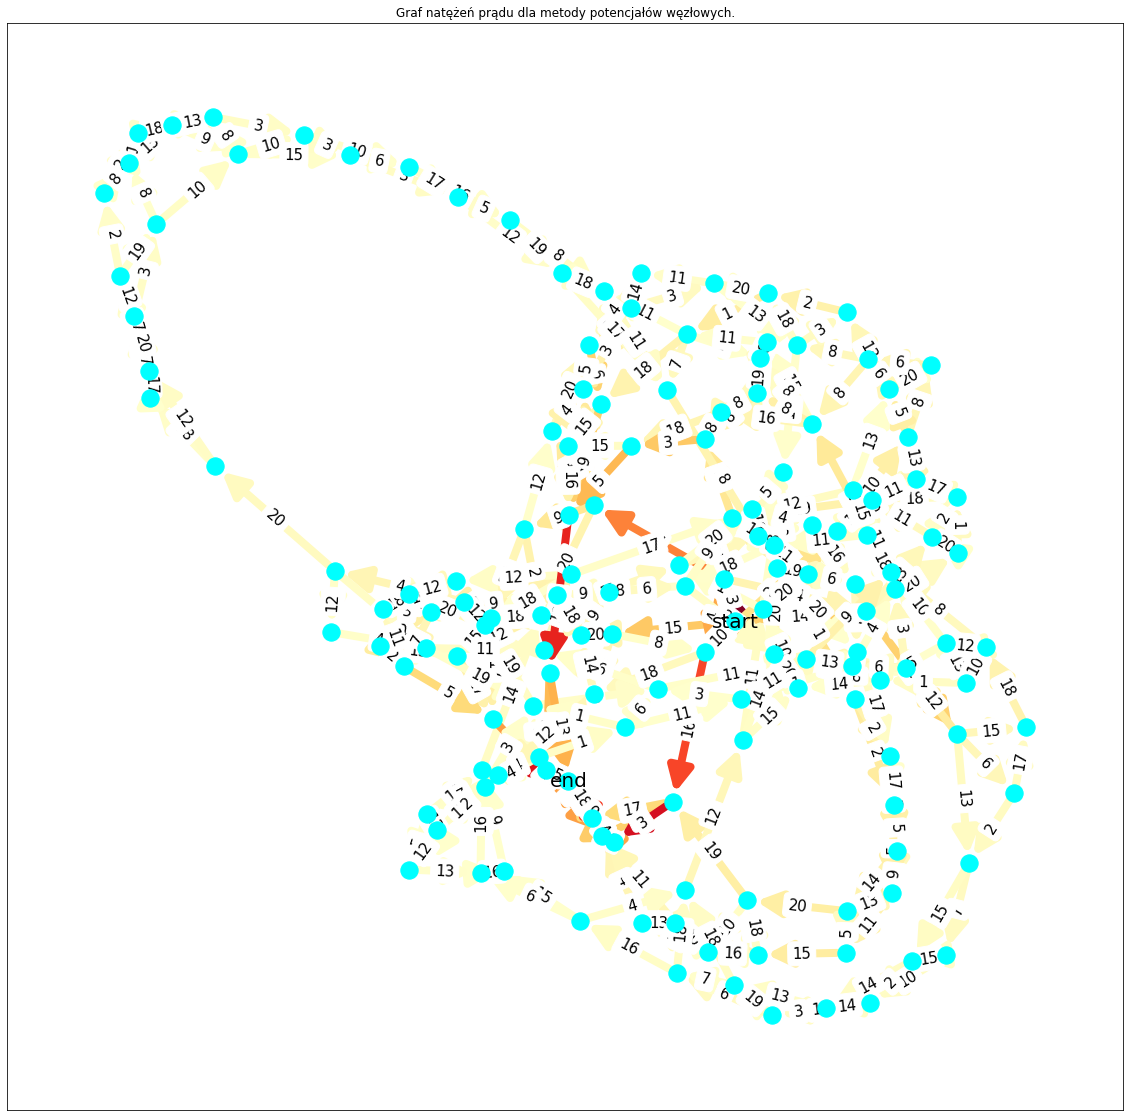

In [35]:
size = 150
k = 4
p = 0.1
file_path = "sw_graph_3.txt"

G1 = nx.connected_watts_strogatz_graph(size, k, p)

edg = []

file = open (file_path, "w")
for u, v in G1.edges():
    u+=1
    v+=1
    edg.append((u,v))
    w = randint (1, 20)
    line = str(u) + " " + str(v) + " " + str(w) + "\n"
    file.write(line)
file.close()

G = nx.Graph()
G.add_edges_from(edg)

calculate_circuit(file_path = file_path, s=1, t=size//2, E=230, pos = nx.spring_layout(G))